# PROJECT OVERVIEW

James M. Irving

Flatiron Full Time Data Science 021119 Cohort

https://mybinder.org/v2/gh/jirvingphd/bs_ds/master

# ABSTRACT:

> Stock Market prices are notoriously difficult to model, but advances in machine learning algorithms in recent years provide renewed possibilities in accurately modeling market performance. One notable addition in modern machine learning is that of Natural Language Processing (NLP). For those modeling a specific stock, performing NLP feature extraction and analysis on the collection of news headlines, shareholder documents, or social media postings that mention the company can provide additional information about the human/social elements to predicting market behaviors. These insights could not be captured by historical price data and technical indicators alone.

> President Donald J. Trump is one of the most prolific users of social media, specifically Twitter, using it as a direct messaging channel to his followers, avoiding the traditional filtering and restriction that normally controls the public influence of the President of the United States. An additional element of the presidency that Trump has avoided is that of financial transparency and divesting of assets. Historically, this is done in order to avoid conflicts of interest, apparent or actual. The president is also known to target companies directly with his Tweets, advocating for specific changes/decisions by the company, or simply airing his greivances. This leads to the natural question, how much influence *does* President Trump exert over the financial markets? 

> To explore this question, we built multiple types of models attempting to answer this question, using the S&P500 as our market index. First, we built a classification model to predict the change in stock price 60 mins after the tweet. We trained Word2Vec embeddings on President Trump's tweets since his election, which we used as the embedding layer for LSTM and GRU neural networks. 

> We next build a baseline time series regression model, using historical price data alone to predict price by trading-hour. We then built upon this, adding several technical indicators of market performance as additional features. 
Finally, we combined the predicitons of our classification model, as well as several other metrics about the tweets (sentiment scores, # of retweets/favorites, upper-to-lowercase ratio,etc.) to see if combining all of these sources of information could explain even more of the variance in stock market prices. 


## MAIN QUESTION:
> #### **Can the Twitter activity of Donald Trump explain fluctuations in the stock market?**

**We will use a combination of traditional stock market forecasting combined with Natural Language Processing and word embeddings from President Trump's tweets to predict fluctuations in the stock market (using S&P 500 as index).**

- **Question 1: Can we predict if stock prices will go up or down at a fixed time point, based on the language in Trump's tweets?**
    - [NLP Model 0](#Model-0)<br><br>
    
- **Question 2: How well can explain stock market fluctuations using only historical price data?**
    - [Stock Market Model 1](#Model-1:-Using-Price-as-only-feature)<br><br>
- **Question 3: Does adding technical market indicators to our model improve its ability to predict stock prices?**
    - [Stock Market Model 2](#Model-2:-Stock-Price-+-Technical-Indicators)<br><br>
- **Question 4: Can the NLP predictions from Question 1, combined with all of the features from Question 3, as well as additional information regarding Trump's Tweets explain even more of the stock market fluctuations?**
    - Stock Market Model 3
    - Stock Market Model X<br><br>

    
### REFERENCES / INSPIRATION:

1. **Stanford Scientific Poster Using NLP ALONE to predict if stock prices increase or decrease 5 mins after Trump tweets.**  
    - [Poster PDF LINK](http://cs229.stanford.edu/proj2017/final-posters/5140843.pdf)
    - Best accuracy was X, goal 1 is to create a classifier on a longer timescale with superior results.
    

2. **TowardsDataScience Blog Plost on "Using the latest advancements in deep learning to predict stock price movements."** 
     - [Blog Post link](https://towardsdatascience.com/aifortrading-2edd6fac689d)

## OVERVIEW OF DATA/FEATURES USED PER MODEL


#### TWITTER DATA - CLASSIFICATION MODEL
**Trained Word2Vec embeddings on collection of Donal Trump's Tweets.**
- Used negative skip-gram method and negative sampling to best represent infrequently used words.
    
**Classified tweets based on change in stock price (delta_price)**
- Calculated price change from time of tweet to 60 mins later.
    - "No Change" if the delta price was < \\$0.05 
    - "Increase" if delta price was >+\\$0.05
    - "Decrease if delta price was >-\\$0.05
    
*NOTE: This model's predictions will become a feature in our final model.*


#### STOCK MARKET (S&P 500) DATA :
##### TIME SERIES FORECASTING USING MARKET DATA
**Model 1: Use price alone to forecast hourly price.**
- Train model using time sequences of 7-trading-hours (1 day) to predict the following hour. 
    * [x] ~~SARIMAX model~~
    * [x] LSTM neural network 

**Model 2: Use price combined with technical indicators.**
    * LSTM neural network
- **Calculate 7 technical indicators from S&P 500 hourly closing price.**
    * [x] 7 days moving average 
    * [x] 21 days moving average
    * [x] exponential moving average
    * [x] momentum
    * [x] Bollinger bands
    * [x] MACD
    
  

#### FINAL MODEL: COMBINING STOCK MARKET DATA,  NLP CLASSIFICATION, AND OTHER TWEET METRICS
- **FEATURES FOR FINAL MODEL:**<br><br>
    - **Stock Data:**
        * [x] 7 days moving average 
        * [x] 21 days moving average
        * [x] exponential moving average
        * [x] momentum
        * [x] Bollinger bands
        * [x] MACD<br><br>
    - **Tweet Data:**
        * [x] 'delta_price' prediction classification for body of tweets from prior hour (model 0)
        * [x] Number of tweets in hour
        * [x] Ratio of uppercase:lowercase ratio (case_ratio)
        * [x] Total # of favorites for the tweets
        * [x] Total # of retweets for the tweets
        * [x] Sentiment Scores:
            - [x] Individual negative, neutral, and positive sentiment scores
            - [x] Compound Sentiment Score (combines all 3)
            - [x] sentiment class (+/- compound score)    

## OSEMN FRAMEWORK

### [OBTAIN](#OBTAIN)
- Obtaining 1-min resolution stock market data (S&P 500 Index)
- Obtain batch of historical tweets by President Trump 

### [SCRUB](#SCRUB)
1. **[Tweets](#TRUMP'S-TWEETS)**
    - Preprocessing for Natural Language Processing<br><br>
2. **[Stock Market](#Loading-&-Processing-Stock-Data-(SCRUB))**
    - Time frequency conversion
    - Technical Indicator Calculation

### [EXPLORE / VISUALIZE](#EXPLORE/VISUALIZE)
- [Tweet Delta Price Classes](#Delta-Price-Classes) 
- [NLP Figures / Example Tweets](#Natural-Language-Processing)
- [S&P 500 Price](#Model-1:-Using-Price-as-only-feature)
- [S&P 500 Technical Indicators](#Technical-Indicator-Details)

### [MODELING (Initial)](#INITIAL-MODELING)
- [Delta-Stock-Price NLP Classifier](#TWEET-DELTA-PRICE-CLASSIFICATON)
- [S&P 500 Neural Network (price only)] ( )

### iNTERPRETATION 
- Delta-Stock-Price NLP Models
    - Model 0A Summary
    - Model 0B Summary
    
- Stock-Market-Forecasting
    - Model 1 Summary
    - Model 2 Summary
    - Model 3 Summary
    - Model 4 Summary
- Final Summary

# OBTAIN

### DATA SOURCES:

* **All Donald Trump tweets from 12/01/2016 (pre-inaugaration day) to end of 08/23/2018**
    *          Extracted from http://www.trumptwitterarchive.com/

* **Minute-resolution data for the S&P500 covering the same time period.**
    *         IVE S&P500 Index from - http://www.kibot.com/free_historical_data.aspx
    
    
* NOTE: Both sources required manual extraction and both 1-min historical stock data and batch-historical-tweet data are difficult to obtain without paying \\$150-\\$2000 monthly developer memberships. 

# SCRUB

In [1]:
## IMPORT CUSTOM CAPSTONE FUNCTIONS
import functions_combined_BEST as ji
import functions_io as io

from functions_combined_BEST import ihelp, ihelp_menu,\
reload, inspect_variables

## IMPORT MY PUBLISHED PYPI PACKAGE 
import bs_ds as  bs
from bs_ds.imports import *

## IMPORT CONVENIENCE/DISPLAY FUNCTIONS
from pprint import pprint
import qgrid
import json
import ipywidgets as widgets

# Import plotly and cufflinks for iplots
import plotly
import cufflinks as cf
from plotly import graph_objs as go
from plotly.offline import iplot
cf.go_offline()

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#Set pd.set_options for tweet visibility
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_columns',50)

## Saving the sys.stdout to restore later
import sys
__stdout__=sys.stdout

file_dict = io.def_filename_dictionary(load_prior=False, save_directory=True)


from functions_combined_BEST import ihelp_menu2
# file_dict = ji.load_filename_directory()

np.random.seed(42)

bs_ds  v0.9.11 loaded.  Read the docs: https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules use: from bs_ds.imports import *



Package,Handle,Description
bs_ds,bs,Custom data science bootcamp student package
matplotlib,mpl,Matplotlib's base OOP module with formatting artists
matplotlib.pyplot,plt,Matplotlib's matlab-like plotting module
numpy,np,scientific computing with Python
pandas,pd,High performance data structures and tools
seaborn,sns,High-level data visualization library based on matplotlib


------------ Dictionary Contents ------------


interactive(children=(Dropdown(description='dict_to_display', options={'file_directory': {'history': '', 'file…

[i] filename_directory saved to data/filename_dictionary.json.
	 - use `update_file_directory(file_dict)` to update file.
[i] creating all required folders...


## TRUMP'S TWEETS

### Natural Language Processing Info



To prepare Donal Trump's tweets for modeling, **it is essential to preprocess the text** and simplify its contents.
<br><br>
1. **At a minimum, things like:**
    - punctuation
    - numbers
    - upper vs lowercase letters<br>
    ***must*** be addressed before any initial analyses. I refer tho this initial cleaning as **"minimal cleaning"** of the text content<br>
    
> Version 1 of the tweet processing removes these items, as well as the removal of any urls in a tweet. The resulting data column is referred to here as "content_min_clean".

<br><br>
2. It is **always recommended** that go a step beyond this and<br> remove **commonly used words that contain little information** <br>for our machine learning algorithms. Words like: (the,was,he,she, it,etc.)<br> are called **"stopwords"**, and it is critical to address them as well.

> Version 2 of the tweet processing removes these items and the resulting data column is referred here as `cleaned_stopped_content`

<br>

3. Additionally, many analyses **need the text tokenzied** into a list of words<br> and not in a natural sentence format. Instead, they are a list of words (**tokens**) separated by ",", which tells the algorithm what should be considered one word.<br><br>For the tweet processing, I used a version of tokenization, called `regexp_tokenziation` <br>which uses pattern of letters and symbols (the `expression`) <br>that indicate what combination of alpha numeric characters should be considered a single token.<br><br>The pattern I used was `"([a-zA-Z]+(?:'[a-z]+)?)"`, which allows for words such as "can't" that contain "'" in the middle of word. This processes was actually applied in order to process Version 1 and 2 of the Tweets, but the resulting text was put back into sentence form. 

> Version 3 of the tweets keeps the text in their regexp-tokenized form and is reffered to as `cleaned_stopped_tokens`
<br>

4. While not always required, it is often a good idea to reduce similar words down to a shared core.
There are often **multiple variants of the same word with the same/simiar meaning**,<br> but one may plural **(i.e. "democrat" and "democrats")**, or form of words is different **(i.e. run, running).**<br> Simplifying words down to the basic core word (or word *stem*) is referred to as **"stemming"**. <br><br> A more advanced form of this also understands things like words that are just in a **different tense** such as  i.e.  **"ran", "run", "running"**. This process is called  **"lemmatization**, where the words are reduced to their simplest form, called "**lemmas**"<br>  
> Version 4 of the tweets are all reduced down to their word lemmas, futher aiding the algorithm in learning the meaning of the texts.


### Tweet Processing

In [2]:
reload(ji)
func_list = [ji.load_raw_twitter_file,
           ji.make_stopwords_list,
           ji.full_twitter_df_processing,
           ji.full_sentiment_analysis]
ji.ihelp_menu(func_list)

ji.save_ihelp_menu_to_file(func_list,filename='_twitter_processing')

GridBox(box_style='warning', children=(HBox(children=(Label(value='Function Menu'), Dropdown(options=('load_ra…

Output()

Functions saved as readme_resources/ihelp_outputs/_twitter_processing.md


In [3]:
## Process twitter data: 
reload(ji)
reload(ji)
## Load in raw csv of twitter_data, create date_time_index, rename columns
raw_tweets = file_dict['twitter_df']['raw_tweet_file']
twitter_df = ji.load_raw_twitter_file(filename=raw_tweets, 
                         date_as_index=True,
                         rename_map={'text': 'content',
                                     'created_at': 'date'})

[io] Loading raw tweet text file: data/trumptwitterarchive_export_iphone_only__08_23_2019.csv


### New - 09/26/19
- Like stanford poster, removing most common words


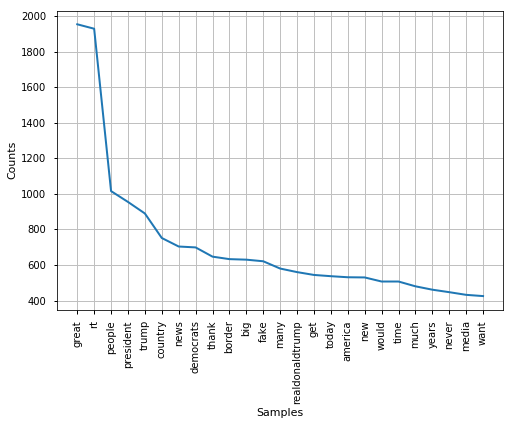

In [4]:
import class_TextProcessor as tp
reload(tp)
TEXTS = tp.TextsProcessor(twitter_df,'content')
TEXTS.fit_FreqDist()

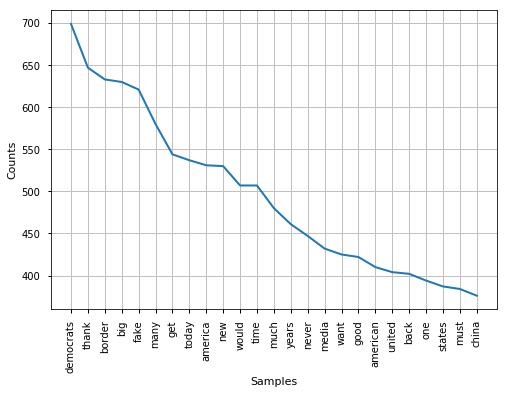

In [5]:
TEXTS.update_stopwords_list(add_words=['rt','great','president','people','trump','country','news','realdonaldtrump'])
TEXTS.fit_FreqDist()

In [6]:
frequent_words = TEXTS.stopwords_list

In [7]:
# 1. create minimally cleaned column `content_min_clean` with urls
twitter_df = ji.full_twitter_df_processing(twitter_df,
                                           raw_tweet_col='content',
                                           name_for_cleaned_tweet_col='content_cleaned',
                                           name_for_stopped_col='cleaned_stopped_content', 
                                           name_for_tokenzied_stopped_col='cleaned_stopped_tokens',
                                           use_col_for_case_ratio='content', 
                                           use_col_for_sentiment='content_min_clean',
                                           RT=True, urls=True, hashtags=True, mentions=True,
                                           str_tags_mentions=True,
                                           stopwords_list=frequent_words, force=True)
                                           #stopwords_list=stop_words, force=True)
## Display Index information
ji.index_report(twitter_df,label='twitter_df')

## Check for strings that exceed the correct tweet length
keep_idx = ji.check_length_string_column(twitter_df, 'content_min_clean',length_cutoff=400,display_describe=False)
## verify no issues arise.
if keep_idx.isna().sum()>0:
    raise Exception('')
else:
    twitter_df=twitter_df[keep_idx]
    print(f'removed {np.sum(keep_idx==False)}')

ji.check_length_string_column(twitter_df, 'content_min_clean',length_cutoff=400,return_keep_idx=False)
twitter_df.head(2)

[i] case_ratio calculated from content before text to lowercase
[i] case->lower and punctuation removed from "content_min_clean" 
[i] stopped text column:  cleaned_stopped_content
[i] tokenized stopped text column:  cleaned_stopped_tokens
[i] lemmaztied columns: cleaned_stopped_lemmas
------------------------------------------------------------
	INDEX REPORT:	twitter_df
------------------------------------------------------------
* Index Endpoints:
	2016-12-01 14:37:57 -- to -- 2019-08-24 03:58:32
* Index Freq:
	None
------------------------------------------------------------
	STRING LENGTH REPORT:	"content_min_clean" column
------------------------------------------------------------
[i] Found 2 # of strings above cutoff of 400 chars.
removed 2
------------------------------------------------------------
	STRING LENGTH REPORT:	"content_min_clean" column
------------------------------------------------------------
[i] Found 0 # of strings above cutoff of 400 chars.


,count,mean,std,min,25%,50%,75%,max
content_min_clean,9320,158.038,84.0307,0,102,136,251,310


,source,content,date,retweet_count,favorite_count,is_retweet,id_str,has_RT,starts_RT,content_starts_RT,content_cleaned,content_min_clean,case_ratio,content_hashtags,hashtag_strings,content_mentions,mention_strings,cleaned_stopped_content,cleaned_stopped_tokens,cleaned_stopped_lemmas,sentiment_scores,compound_score,sentiment_class,neg,neu,pos
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-01 14:37:57,Twitter for iPhone,My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southe...,2016-12-01 14:37:57,12077,65724,False,804333718999539712,False,False,[],My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southe...,my thoughts and prayers are with those affected by the tragic storms and tornadoes in the southe...,0.03906,[],,[],,thoughts prayers affected tragic storms tornadoes southeastern united states stay safe,"[thoughts, prayers, affected, tragic, storms, tornadoes, southeastern, united, states, stay, safe]",thought prayer affected tragic storm tornado southeastern united state stay safe,"{'neg': 0.168, 'neu': 0.623, 'pos': 0.209, 'compound': 0.2732}",0.2732,pos,0.168,0.623,0.209
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio for a 7pm rally. Join me! Tickets: https://t.co/Hi...,2016-12-01 22:52:10,5564,31256,False,804458095569158144,False,False,[],Heading to U.S. Bank Arena in Cincinnati Ohio for a 7pm rally. Join me! Tickets:,heading to u s bank arena in cincinnati ohio for a 7pm rally join me tickets,0.13462,[],,[],,heading bank arena cincinnati ohio pm rally join tickets,"[heading, bank, arena, cincinnati, ohio, pm, rally, join, tickets]",heading bank arena cincinnati ohio pm rally join ticket,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296}",0.2960,pos,0.000,0.845,0.155


### New - 09/21/19
- Removing 'starts_RT' tweets

In [8]:
display(twitter_df['is_retweet'].value_counts())

twitter_df = twitter_df.query('is_retweet == False')
display(twitter_df['is_retweet'].value_counts())

False    7357
True     1907
Name: is_retweet, dtype: int64

False    7357
Name: is_retweet, dtype: int64

In [9]:
# # Dropping columns about retweets
# drop_cols = ['has_RT','content_starts_RT','starts_RT']
# twitter_df.drop(drop_cols,axis=1,inplace=True)

In [10]:
ji.display_same_tweet_diff_cols(twitter_df)

#### TWEET FROM 08-19-2019 13:44:58:

* **["content"] column:**<p><blockquote>***"Democrats want Open Borders and Crime! So dangerous for our Country. But we are building a big beautiful NEW Wall! I will protect America the Dems don’t know where to start! https://t.co/D0APaAxvVm"***

* **["content_min_clean"] column:**<p><blockquote>***"democrats want open borders and crime  so dangerous for our country  but we are building a big beautiful new wall  i will protect america the dems don’t know where to start  "***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"democrats want open borders crime dangerous building big beautiful new wall protect america dems know start"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['democrats', 'want', 'open', 'borders', 'crime', 'dangerous', 'building', 'big', 'beautiful', 'new', 'wall', 'protect', 'america', 'dems', 'know', 'start']"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"democrat want open border crime dangerous building big beautiful new wall protect america dems know start"***

In [11]:
## Search all tweets for occurances of specific words
word = 'fed'
idx_russia_tweets = ji.search_for_tweets_with_word(twitter_df, word =word,
                                     display_n=5, from_column='content',
                                     return_index=True, display_df=True)

date,content,retweet_count,favorite_count,source,compound_score,sentiment_class
2019-08-23 14:59:04,....your companies HOME and making your products in the USA. I will be responding to China’s Tariffs this afternoon. This is a GREAT opportunity for the United States. Also I am ordering all carriers including Fed Ex Amazon UPS and the Post Office to SEARCH FOR & REFUSE....,18834,80742,Twitter for iPhone,0.8481,pos
2019-08-23 14:57:40,As usual the Fed did NOTHING! It is incredible that they can “speak” without knowing or asking what I am doing which will be announced shortly. We have a very strong dollar and a very weak Fed. I will work “brilliantly” with both and the U.S. will do great...,15829,67912,Twitter for iPhone,0.6705,pos
2019-08-23 14:40:56,As usual the Fed did NOTHING! It is incredible that they can “speak” without knowing or asking what I am doing which will be announced shortly. We have a very strong dollar and a very weak Fed. I will work “brilliantly” with both and the U.S. will do great...,2329,7811,Twitter for iPhone,0.6705,pos
2019-08-23 13:01:33,Now the Fed can show their stuff!,13354,63624,Twitter for iPhone,0,pos
2019-08-22 14:21:52,The Economy is doing really well. The Federal Reserve can easily make it Record Setting! The question is being asked why are we paying much more in interest than Germany and certain other countries? Be early (for a change) not late. Let America win big rather than just win!,19365,78056,Twitter for iPhone,0.9499,pos


	 * there are 146 tweets not shown. Next index = 2019-08-21 23:01:31


### Calculating `delta_price_class` for Each Tweet
#### Using S&P 500 Price  1-min-resolution for `delta_price`

In [12]:
func_list = [ji.load_raw_stock_data_from_txt, 
            ji.set_timeindex_freq,
            ji.load_twitter_df_stock_price]

ji.ihelp_menu(func_list)
ji.save_ihelp_menu_to_file(func_list,'_stock_data_to_twitter_data')

GridBox(box_style='warning', children=(HBox(children=(Label(value='Function Menu'), Dropdown(options=('load_ra…

Output()

Functions saved as readme_resources/ihelp_outputs/_stock_data_to_twitter_data.md


#### Add Delta Stock Price Data - For *Each* Tweet

In [13]:
ji.column_report(twitter_df)

[i] qgrid returned. Use gqrid.get_changed_df() to get edited df back.


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [14]:
print(f"[i] # number of tweets = {twitter_df.shape[0]}")

## add stock_price for twitter_df
null_ratio = ji.check_null_small(twitter_df,null_index_column='case_ratio')

print(f'[!] {len(null_ratio)} null values for "case_ratio" are tweets containing only urls. Dropping...')
twitter_df.dropna(subset=['is_retweet','case_ratio'],inplace=True)
print(f"[i] New # of tweets = {twitter_df.shape[0]}\n")


twitter_df = ji.load_twitter_df_stock_price(twitter_df, 
                                           get_stock_prices_per_tweet=True,
                                           price_mins_after_tweet=60)

ji.index_report(twitter_df);

[i] # number of tweets = 7357


------------------------------
Columns with Null Values
------------------------------
Series([], dtype: int64)


[!] 0 null values for "case_ratio" are tweets containing only urls. Dropping...
[i] New # of tweets = 7357

[io] Loading 1-minute-resolution stock_prices...
[i] Adding stock_price data for 60 mins post-tweets using `get_stock_prices_for_twitter_data`...
[i] Limiting twitter_df timeindex to match stock_price.
------------------------------------------------------------
	INDEX REPORT:	
------------------------------------------------------------
* Index Endpoints:
	2016-12-01 14:37:57 -- to -- 2019-08-23 14:59:05
* Index Freq:
	None


In [15]:
idx_null_delta = ji.check_null_small(twitter_df,null_index_column='delta_price');
print(f"[!] {len(idx_null_delta)} null values for 'delta_price' were off-hour tweets,\
more than 1 day before the market reopened. Dropping...")
twitter_df.dropna(subset=['delta_price'], inplace=True)

print(f"\n[i] Final # of tweets = {twitter_df.shape[0]}")



------------------------------
Columns with Null Values
------------------------------
stock_price_results    1855
B_ts_rounded           1855
pre_tweet_price        1855
mins_after_tweet       1855
B_ts_post_tweet        1855
post_tweet_price       1855
delta_time             1855
delta_price            1855
dtype: int64


[!] 1855 null values for 'delta_price' were off-hour tweets,more than 1 day before the market reopened. Dropping...

[i] Final # of tweets = 5486


In [16]:
# ji.column_report(twitter_df, as_df=True)

### Determining Cutoffs for Delta Price Classes

In [17]:
## Examine delta_price
print("CURRENT # OF POSTITIVE AND NEGATIVE PRICE DELTAS:")
print(twitter_df['delta_price_class'].value_counts())

## Examining Changes to classes if use a "No Change" cutoff of $0.05
delta_price = twitter_df['delta_price']
small_pos =[ 0 < x <.05 for x in delta_price] #/len(delta_price)
small_neg = [-.05<x <0 for x in delta_price]

print('\nCHANGES TO CLASSES IF USING ATHRESHOLD OF $0.05:\n','---'*12)
print(f'# Positive Delta -> "No Change" = {np.sum(small_pos)}')
print(f'# Negative Delta -> "No Change" = {np.sum(small_neg)}')
print(f'# of Unchanged Classifications =  {len(delta_price)-(np.sum(small_pos)+np.sum(small_neg))}')

CURRENT # OF POSTITIVE AND NEGATIVE PRICE DELTAS:
pos    3121
neg    2365
Name: delta_price_class, dtype: int64

CHANGES TO CLASSES IF USING ATHRESHOLD OF $0.05:
 ------------------------------------
# Positive Delta -> "No Change" = 414
# Negative Delta -> "No Change" = 448
# of Unchanged Classifications =  4624


In [18]:
## BIN DELTA PRICE CLASS
bins = pd.IntervalIndex.from_tuples([ (-np.inf,-.05), (-.05,.05), (.05,np.inf)], closed='left')
## Save indexer column for 'delta_price'
twitter_df['indexer'] = bins.get_indexer(twitter_df['delta_price'])

# remap -1,0,1,2 to classes
mapper ={-1:np.nan, 0:0, 1:1,2:2}
# remap string classes
mapper2 = {0:'neg', 1:'no_change',2:'pos'}

## Use indexer to map new integer values
twitter_df['delta_price_class_int']= twitter_df['indexer'].apply(lambda x: mapper[x])
twitter_df['delta_price_class'] = twitter_df['delta_price_class_int'].apply(lambda x: mapper2[x])

## Verify mapping of string and integer classes
res1 = pd.DataFrame(twitter_df['delta_price_class'].value_counts())
res2 = pd.DataFrame(twitter_df['delta_price_class_int'].value_counts())
bs.display_side_by_side(res1,res2)

,delta_price_class
pos,2707
neg,1863
no_change,916
,delta_price_class_int
2,2707
0,1863
1,916


## EXPLORE/VISUALIZE 
### Delta Price Classes

In [19]:
ji.plotly_price_histogram(twitter_df,show_fig=True,as_figure=False)
ji.plotly_pie_chart(twitter_df, column_to_plot='delta_price_class',show_fig=True, as_figure=False)

### NLP by Delta Price Class

- For comparison of words and bigrams, we will exclude the 'no change' class. 

In [20]:
# twitter_df['delta_price_class']
bs.check_null_small(twitter_df)



------------------------------
Columns with Null Values
------------------------------
Series([], dtype: int64)




In [21]:
nlp_df = twitter_df.loc[twitter_df['delta_price_class']!='no_change'].copy()
# nlp_df.dropna(inplace=True)
nlp_df.head(2)

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,has_RT,starts_RT,content_starts_RT,content_cleaned,content_min_clean,case_ratio,content_hashtags,hashtag_strings,content_mentions,mention_strings,cleaned_stopped_content,cleaned_stopped_tokens,cleaned_stopped_lemmas,sentiment_scores,compound_score,sentiment_class,neg,neu,pos,day,time,dayofweek,B_day,B_shifted,B_time,B_dt_index,time_shift,B_dt_minutes,stock_price_results,null_results,B_ts_rounded,pre_tweet_price,mins_after_tweet,B_ts_post_tweet,post_tweet_price,delta_time,delta_price,delta_price_class,delta_price_class_int,indexer
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-01 14:37:57,Twitter for iPhone,My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southe...,2016-12-01 14:37:57,12077,65724,False,804333718999539712,False,False,[],My thoughts and prayers are with those affected by the tragic storms and tornadoes in the Southe...,my thoughts and prayers are with those affected by the tragic storms and tornadoes in the southe...,0.03906,[],,[],,thoughts prayers affected tragic storms tornadoes southeastern united states stay safe,"[thoughts, prayers, affected, tragic, storms, tornadoes, southeastern, united, states, stay, safe]",thought prayer affected tragic storm tornado southeastern united state stay safe,"{'neg': 0.168, 'neu': 0.623, 'pos': 0.209, 'compound': 0.2732}",0.2732,pos,0.168,0.623,0.209,2016-12-01,14:37:57,Thursday,2016-12-01,False,14:37:57,2016-12-01 14:37:57,0 days,2016-12-01 14:38:00,"{'B_ts_rounded': 2016-12-01 14:38:00, 'pre_tweet_price': 93.97, 'mins_after_tweet': 60, 'B_ts_po...",False,2016-12-01 14:38:00,93.97,60.0,2016-12-01 15:38:00,93.82,01:00:00,-0.15,neg,0,0
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio for a 7pm rally. Join me! Tickets: https://t.co/Hi...,2016-12-01 22:52:10,5564,31256,False,804458095569158144,False,False,[],Heading to U.S. Bank Arena in Cincinnati Ohio for a 7pm rally. Join me! Tickets:,heading to u s bank arena in cincinnati ohio for a 7pm rally join me tickets,0.13462,[],,[],,heading bank arena cincinnati ohio pm rally join tickets,"[heading, bank, arena, cincinnati, ohio, pm, rally, join, tickets]",heading bank arena cincinnati ohio pm rally join ticket,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296}",0.2960,pos,0.000,0.845,0.155,2016-12-01,22:52:10,Thursday,2016-12-01,False,22:52:10,2016-12-01 22:52:10,0 days,2016-12-01 22:52:00,"{'B_ts_rounded': 2016-12-02 09:30:00, 'pre_tweet_price': 93.97, 'mins_after_tweet': 60, 'B_ts_po...",False,2016-12-02 09:30:00,93.97,60.0,2016-12-02 10:30:00,94.03,01:00:00,0.06,pos,2,2


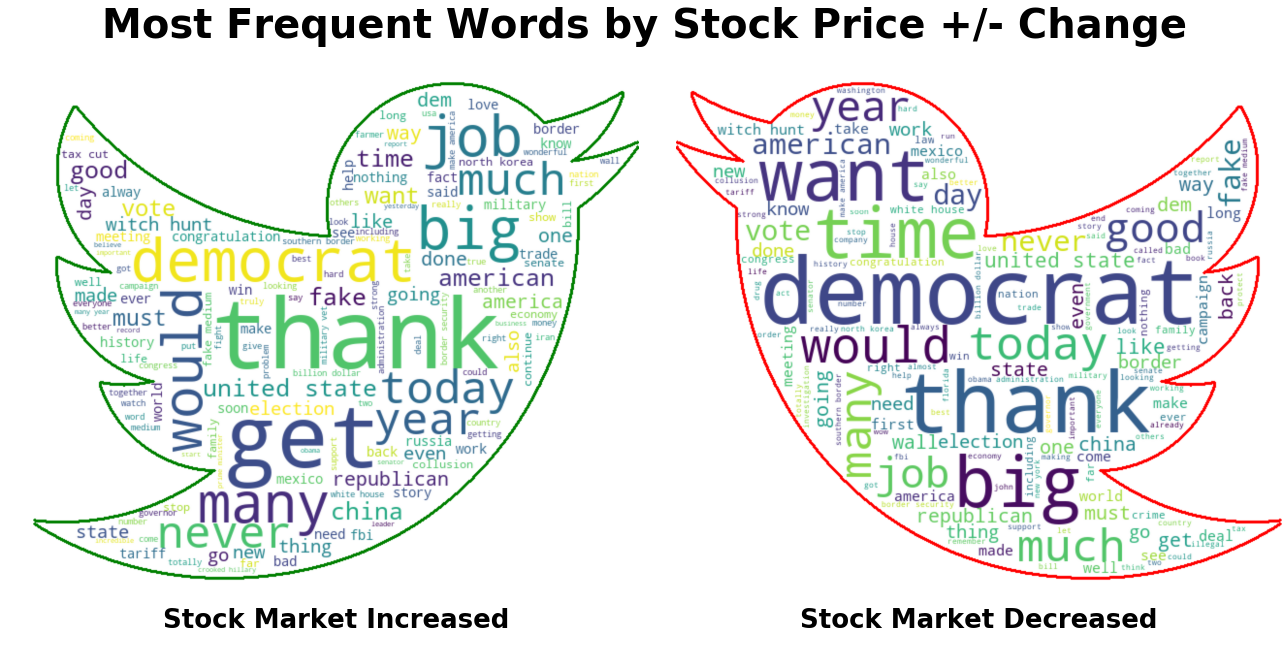

figured saved as figures/wordcloud_top_words_by_delta_price.png


In [22]:
# Generate wordclouds
twitter_df_groups,twitter_group_text = ji.get_group_texts_for_word_cloud(nlp_df, 
                                                                      text_column='cleaned_stopped_lemmas', 
                                                                      groupby_column='delta_price_class')


ji.compare_word_clouds(text1=twitter_df_groups['pos']['joined'],
                       label1='Stock Market Increased',
                       text2= twitter_df_groups['neg']['joined'],
                       label2='Stock Market Decreased',
                       twitter_shaped = True, verbose=1,
                       suptitle_y_loc=0.75,
                       suptitle_text='Most Frequent Words by Stock Price +/- Change',
                       wordcloud_cfg_dict={'collocations':True},
                       save_file=True,filepath_folder='',
                       png_filename=file_dict['nlp_figures']['word_clouds_compare'],
                      **{'subplot_titles_fontdict':{'fontsize':26,'fontweight':'bold'},
                        'suptitle_fontdict':{'fontsize':40,'fontweight':'bold'},
                         'group_colors':{'group1':'green','group2':'red'},
                        });

Unique Text1 Words,Frequency
bank,19
mccain,11
courage,10
con,10
facility,10
era,9
nervous,8
nasty,8
project,8
singapore,8


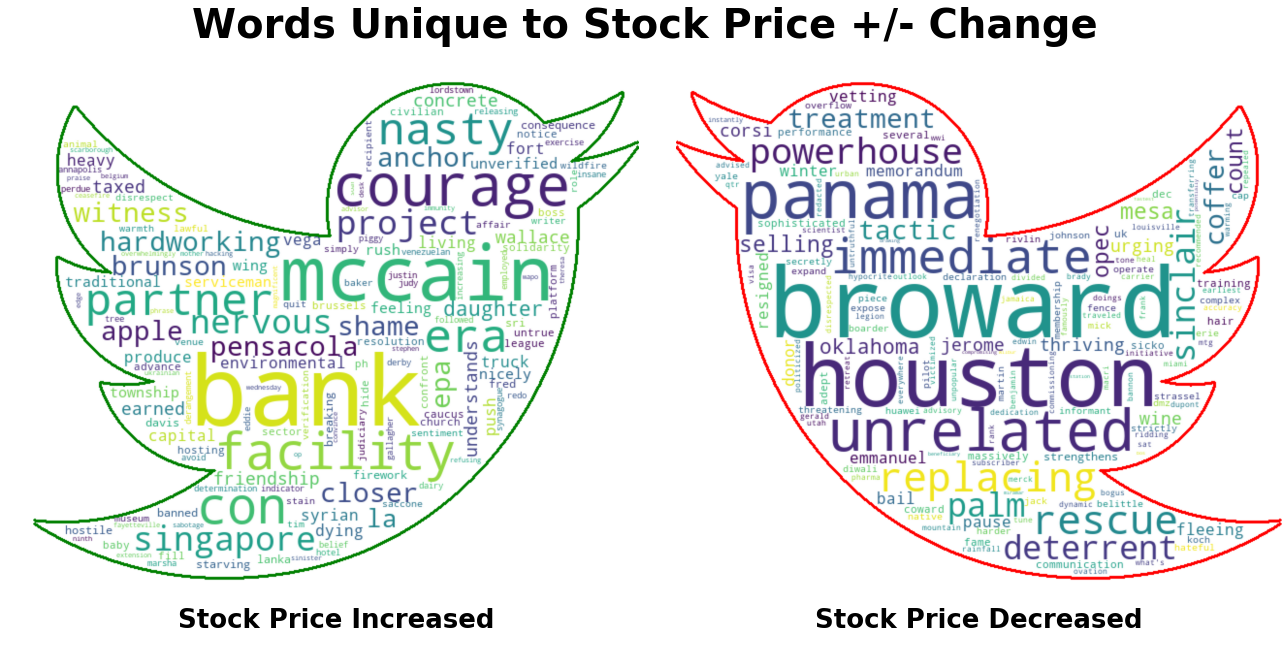

figured saved as figures/wordcloud_unique_words_by_delta_price.png


In [23]:
## Comparing words ONLY unique to each group
df_pos_words, df_neg_words = ji.compare_freq_dists_unique_words(text1=twitter_df_groups['pos']['text_tokens'],
                                                                label1='Price Increased',
                                                                text2=twitter_df_groups['neg']['text_tokens'],
                                                                label2='Price Decreased',
                                                                top_n=20, display_dfs=True,
                                                                return_as_dicts=False)

pos_freq_dict, neg_freq_dict = ji.compare_freq_dists_unique_words(text1=twitter_df_groups['pos']['text_tokens'],
                                                                label1='Price Increased',
                                                                text2=twitter_df_groups['neg']['text_tokens'],
                                                                label2='Price Decreased',
                                                                top_n=20, display_dfs=False,
                                                                return_as_dicts=True)


## WORDCLOUD OF WORDS UNIQUE TO TWEETS THAT INCREASED VS DECREASED STOCK PRICE
ji.compare_word_clouds(text1= pos_freq_dict,label1='Stock Price Increased',
                       text2=neg_freq_dict, label2='Stock Price Decreased',
                       twitter_shaped=True, from_freq_dicts=True,
                       suptitle_y_loc=0.75,wordcloud_cfg_dict={'collocations':True},
                       suptitle_text='Words Unique to Stock Price +/- Change',
                       save_file=True,filepath_folder='',
                       png_filename=file_dict['nlp_figures']['word_clouds_compare_unique'],
                       **{'subplot_titles_fontdict':
                         {'fontsize':26,
                         'fontweight':'bold'},
                        'suptitle_fontdict':{
                         'fontsize':40,
                         'fontweight':'bold'},
                         'group_colors':{
                             'group1':'green','group2':'red'}
                        });

In [24]:
ji.make_tweet_bigrams_by_group(twitter_df_groups)

,Frequency
Bigram,
united states,0.00283678
witch hunt,0.00198575
white house,0.00159569
north korea,0.00148931
border security,0.00145385
southern border,0.00120563
fake media,0.00117017
make america,0.00106379
new york,0.000957413


# INITIAL MODELING

## TWEET DELTA PRICE CLASSIFICATON

### Creating Word Embeddings with Word2Vec

- Good Parameters for Non-Retweets:
```python
params = {
'text_column': 'cleaned_stopped_lemmas',
'window':3,
'min_count':2,
'epochs':10,
'sg':1, 
'hs':0,
'negative':5,
'ns_exponent':-0.5
}
```

In [25]:
func_list = [ji.make_word2vec_model,ji.get_wv_from_word2vec,
            ji.get_w2v_kwargs,ji.Word2vecParams]
ihelp_menu(func_list)
ji.save_ihelp_menu_to_file(func_list,'_word2vec')

GridBox(box_style='warning', children=(HBox(children=(Label(value='Function Menu'), Dropdown(options=('make_wo…

Output()

Functions saved as readme_resources/ihelp_outputs/_word2vec.md


In [26]:
## Loading custom class for tracking Word2Vec parameters
w2vParams = ji.Word2vecParams()        
w2vParams.params_template()

[i] call .params_template() for dict to copy/pate.
#TEMPLATE(call.show_info() for details:

        w2vparams = {
        'text_column': 'cleaned_stopped_lemmas',
        'window':3-5,
        'min_count':1-3,
        'epochs':10-20,
        'sg':0 or 1, 
        'hs':'0 or 1,
        'negative': 0 or 5-20 ,
        'ns_exponent':-1.0 to 1.0
        }


In [28]:
## FITING WORD2VEC AND TOKENIZER    
params = {
'text_column': 'cleaned_stopped_lemmas',
'window':3,
'min_count':2,
'epochs':10,
'sg':1, 
'hs':0,
'negative':5,
'ns_exponent':-0.5
}
model_kwds=  ji.get_w2v_kwargs(params)    

# text_data = twitter_df[params['text_column']]
## using df_tokenize for full body of a text for word2vec
word2vec_model = ji.make_word2vec_model(twitter_df,
                                        text_column = params['text_column'],
                                        window = params['window'],
                                        min_count= params['min_count'],
                                        epochs = params['epochs'],
                                        verbose=1,
                                        return_full=True,
                                        **model_kwds)

w2vParams.append(params)

wv = word2vec_model.wv

### USING WORD VECTOR MATH TO GET A FEEL FOR QUALITY OF MODEL
wv = word2vec_model.wv
def V(string,wv=wv):
    return wv.get_vector(string)
def equals(vector,wv=wv):
    return wv.similar_by_vector(vector)

list_of_equations = ["V('republican')-V('honor')",
                    "V('man')+V('power')",
                     "V('russia')+V('honor')",
                     "V('china')+V('tariff')",
                     "V('flip')+V('lie')"]

for eqn in list_of_equations:
    print(f'\n* {eqn} =')
    res = eval(f"equals({eqn})")
    [print('\t',x) for x in res]

[i] Training Word2Vec model using:
	{'min_count': 2, 'window': 3, 'epochs': 10, 'sg': 1, 'hs': 0, 'negative': 5, 'ns_exponent': -0.5}
	[i] Training complete. model vocab has 4681 words, with vector size 300.
	[o] returned model is full model.
- params saved.

* V('republican')-V('honor') =
	 ('democrat', 0.5201656818389893)
	 ('crime', 0.5091263055801392)
	 ('dems', 0.4766846299171448)
	 ('collusion', 0.4588388204574585)
	 ('wall', 0.43985798954963684)
	 ('illegal', 0.4344051480293274)
	 ('mueller', 0.4221932888031006)
	 ('hunt', 0.4074691832065582)
	 ('want', 0.40495115518569946)
	 ('witch', 0.4026387631893158)

* V('man')+V('power') =
	 ('nice', 0.9993150234222412)
	 ('son', 0.9992566108703613)
	 ('named', 0.9992438554763794)
	 ('brunson', 0.9992297291755676)
	 ('businessman', 0.9992105960845947)
	 ('four', 0.9992080330848694)
	 ('nyc', 0.9991971254348755)
	 ('husband', 0.9991946220397949)
	 ('note', 0.9991718530654907)
	 ('brilliant', 0.999169111251831)

* V('russia')+V('honor') =
	

In [32]:
import functions_io as io
io.save_word2vec(word2vec_model,file_dict,parms_dict=w2vParams.last_params)



[i] word2vec model saved as models/word2vec/word2vec_model.pkl


### Using Pre-Trained GloVe Twitter Vectors

#### Comparing Word Math W2V vs Glove

In [39]:
## Save Glove Twitter Vectors to A Glove File For Word Math
folder_for_vectors ='D:\\Users\\James\\Dropbox (Personal)\\CODING\\DATASETS\\embeddings\\' 
glove_file = 'glove.twitter.27B.100d.txt'

# define full input glove and output word2vec filepaths
glove_filepath = folder_for_vectors+glove_file
w2v_filepath = folder_for_vectors+'glove_to_w2vec.txt'
print(w2v_filepath)
print(glove_filepath)

## Load in saved glove vectors using KeyedVectors.load_word2vec_format()
from gensim.models import Word2Vec, KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_filepath,w2v_filepath)
glovew2v_model = KeyedVectors.load_word2vec_format(w2v_filepath)
wvg = glovew2v_model.wv

D:\Users\James\Dropbox (Personal)\CODING\DATASETS\embeddings\glove_to_w2vec.txt
D:\Users\James\Dropbox (Personal)\CODING\DATASETS\embeddings\glove.twitter.27B.100d.txt


In [40]:
def V(string,wv=wvg):
    return wv.get_vector(string)

def equals(vector,wv=wvg):
    return wv.similar_by_vector(vector)

list_of_equations = ["V('republican')-V('honor')",
                    "V('man')+V('power')",
                     "V('russia')+V('honor')",
                     "V('china')+V('tariff')",
                     "V('trump')+V('lie')"]

for eqn in list_of_equations:
    print(f'\n* {eqn} =')
    res = eval(f"equals({eqn})")
    [print('\t',x) for x in res]


* V('republican')-V('honor') =
	 ('democrat', 0.6441429257392883)
	 ('republican', 0.6328644156455994)
	 ('lawmaker', 0.5897228717803955)
	 ('democrats', 0.5599323511123657)
	 ('pollster', 0.5577528476715088)
	 ('gop', 0.5573146343231201)
	 ('repub', 0.5532326698303223)
	 ('conservative', 0.5530012845993042)
	 ('leftist', 0.5517475008964539)
	 ('repubs', 0.5464478135108948)

* V('man')+V('power') =
	 ('man', 0.8873944282531738)
	 ('power', 0.8451700806617737)
	 ('the', 0.7877989411354065)
	 ('that', 0.7856220602989197)
	 ('way', 0.7801435589790344)
	 ('is', 0.7666593194007874)
	 ("'s", 0.7663742899894714)
	 ('it', 0.7618885636329651)
	 ('but', 0.7613304257392883)
	 ('up', 0.7603663206100464)

* V('russia')+V('honor') =
	 ('russia', 0.7759005427360535)
	 ('honor', 0.748315155506134)
	 ('israel', 0.7228232622146606)
	 ('america', 0.6959772109985352)
	 ('us', 0.6944633722305298)
	 ('president', 0.6801765561103821)
	 ('world', 0.6779952049255371)
	 ('ukraine', 0.6751965880393982)
	 ('unio

In [41]:
## ADDING PRETRAINED GLOVE EMBEDDINGS
fp = r'D:\Users\James\Dropbox (Personal)\CODING\DATASETS\embeddings\glove.twitter.27B.100d.txt'
word2index, embedding_matrix_gl = ji.load_glove_embeddings(fp,encoding='utf-8',embedding_dim=100)

vocab_size = embedding_matrix_gl.shape[0]
vector_size = embedding_matrix_gl.shape[1]

### Class Balancing

In [42]:
## Select smaller subset of twitter_df for df_tokenize
columns_for_model_0 = ['delta_price_class','delta_price','pre_tweet_price',
                       'post_tweet_price','delta_time','B_ts_rounded','B_ts_post_tweet','content',
                       'content_min_clean','cleaned_stopped_content','cleaned_stopped_tokens',
                       'cleaned_stopped_lemmas','delta_price_class_int']

df_tokenize=twitter_df[columns_for_model_0].copy()
ji.check_class_balance(df_tokenize,'delta_price_class_int',as_raw=True, as_percent=False)
ji.check_class_balance(df_tokenize,'delta_price_class',as_raw=False)

------------------------------------------------------------
CLASS VALUE COUNTS FOR COL "delta_price_class_int":
------------------------------------------------------------
- Class Counts:
2    2707
0    1863
1     916
Name: delta_price_class_int, dtype: int64
---

------------------------------------------------------------
CLASS VALUE COUNTS FOR COL "delta_price_class":
------------------------------------------------------------
- Classes (%):
pos          49.34
neg          33.96
no_change    16.70
Name: delta_price_class, dtype: float64
---



In [43]:
ji.save_ihelp_to_file(ji.undersample_df_to_match_classes)
ihelp_menu([ji.undersample_df_to_match_classes])

GridBox(box_style='warning', children=(HBox(children=(Label(value='Function Menu'), Dropdown(options=('undersa…

Output()

In [44]:
## RESTRICTING TIME DELTAS FOR MODEL
remove_delta_time_tweets=True

## RESAMPLING 
undersample_to_match_classes = True#True
class_column='delta_price_class'
class_list_to_keep = None # None=all classes or ['neg','pos']

## Display results
show_tweet_versions = True


print('[0] INITIAL CLASS COUNTS.')
## Print initial class balance
ji.check_class_balance(df_tokenize,col=class_column);

## REMOVE TWEETS BASED ON TIME BETWEEN TWEET AND STOCK PRICE VALUE
if remove_delta_time_tweets:
    ## SAMPLE ONLY TWEETS WITHIN 1 DAY OF STOCK MARKET PRICE DATA
    df_sampled = df_tokenize.loc[df_tokenize['delta_time']<'1 day']
    print(f"[1] # OF DAYS REMOVED BY 'delta_time' = {df_tokenize.shape[0]-df_sampled.shape[0]}")
    ji.check_class_balance(df_sampled, col=class_column, as_raw=True, as_percent=False)
else:
    print('[1] Skipping removing tweets by time_delta')
    df_sampled = df_tokenize
    
    
## UNDERSAMPLE FROM UNBALANCED CLASSES
if undersample_to_match_classes:
    
    ## Print status
    if class_list_to_keep is None:
        print_class_list= list(df_sampled[class_column].unique())
    else:
        print_class_list = class_list_to_keep
    print(f'[2] RESAMPLING DF TO MATCH SMALLEST CLASS.\n\tBalancing: {print_class_list}')
    
    ## RESAMPLE TO MATCH CLASSES
    df_sampled = ji.undersample_df_to_match_classes(df_sampled,
                                                    class_column=class_column,
                                                    class_values_to_keep=class_list_to_keep,verbose=0)
    ji.check_class_balance(df_sampled,col=class_column, as_percent=False)
    
    
else:
    print('\n[2] Skipping balancing classes and keeping all 3 classes.')

## Display final output
dash = '---'*20
print(f"\n\n [i] Final class balance:")
ji.check_class_balance(df_sampled,col=class_column)

display(df_sampled.head(2))

show_tweet_versions=True
if show_tweet_versions:
    ji.display_same_tweet_diff_cols(df_sampled,
                                    columns = ['content' ,'content_min_clean',
                                               'cleaned_stopped_content',
                                               'cleaned_stopped_tokens',
                                              'cleaned_stopped_lemmas'],as_md=True)     

[0] INITIAL CLASS COUNTS.
------------------------------------------------------------
CLASS VALUE COUNTS FOR COL "delta_price_class":
------------------------------------------------------------
- Classes (%):
pos          49.34
neg          33.96
no_change    16.70
Name: delta_price_class, dtype: float64
- Class Counts:
pos          2707
neg          1863
no_change     916
Name: delta_price_class, dtype: int64
---

[1] # OF DAYS REMOVED BY 'delta_time' = 17
------------------------------------------------------------
CLASS VALUE COUNTS FOR COL "delta_price_class":
------------------------------------------------------------
- Class Counts:
pos          2701
neg          1858
no_change     910
Name: delta_price_class, dtype: int64
---

[2] RESAMPLING DF TO MATCH SMALLEST CLASS.
	Balancing: ['neg', 'pos', 'no_change']
------------------------------------------------------------
CLASS VALUE COUNTS FOR COL "delta_price_class":
------------------------------------------------------------


,delta_price_class,delta_price,pre_tweet_price,post_tweet_price,delta_time,B_ts_rounded,B_ts_post_tweet,content,content_min_clean,cleaned_stopped_content,cleaned_stopped_tokens,cleaned_stopped_lemmas,delta_price_class_int
date,,,,,,,,,,,,,
2019-08-23 14:59:04,neg,-0.49,112.77,112.28,01:00:00,2019-08-23 14:59:00,2019-08-23 15:59:00,....your companies HOME and making your products in the USA. I will be responding to China’s Tar...,your companies home and making your products in the usa i will be responding to china’s tar...,companies home making products usa responding china tariffs afternoon opportunity united states ...,"[companies, home, making, products, usa, responding, china, tariffs, afternoon, opportunity, uni...",company home making product usa responding china tariff afternoon opportunity united state also ...,0
2019-08-23 14:59:04,neg,-0.49,112.77,112.28,01:00:00,2019-08-23 14:59:00,2019-08-23 15:59:00,....better off without them. The vast amounts of money made and stolen by China from the United ...,better off without them the vast amounts of money made and stolen by china from the united ...,better without vast amounts money made stolen china united states year year decades must stop am...,"[better, without, vast, amounts, money, made, stolen, china, united, states, year, year, decades...",better without vast amount money made stolen china united state year year decade must stop ameri...,0


#### TWEET FROM 02-08-2018 18:44:00:

* **["content"] column:**<p><blockquote>***"date
2018-02-08 18:44:00    I will be meeting with Henry Kissinger at 1:45pm. Will be discussing North Korea China and the M...
Name: content, dtype: object"***

* **["content_min_clean"] column:**<p><blockquote>***"date
2018-02-08 18:44:00    i will be meeting with henry kissinger at 1 45pm  will be discussing north korea china and the m...
Name: content_min_clean, dtype: object"***

* **["cleaned_stopped_content"] column:**<p><blockquote>***"date
2018-02-08 18:44:00    meeting henry kissinger pm discussing north korea china middle east
Name: cleaned_stopped_content, dtype: object"***

* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"date
2018-02-08 18:44:00    [meeting, henry, kissinger, pm, discussing, north, korea, china, middle, east]
Name: cleaned_stopped_tokens, dtype: object"***

* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"date
2018-02-08 18:44:00    meeting henry kissinger pm discussing north korea china middle east
Name: cleaned_stopped_lemmas, dtype: object"***

In [45]:
ji.check_class_balance(df_sampled)

------------------------------------------------------------
CLASS VALUE COUNTS FOR COL "delta_price_class_int":
------------------------------------------------------------
- Classes (%):
1    33.33
2    33.33
0    33.33
Name: delta_price_class_int, dtype: float64
- Class Counts:
1    910
2    910
0    910
Name: delta_price_class_int, dtype: int64
---



### Tokenization, X,y train-test-split

In [46]:
# ## 
# wv = ji.get_wv_from_word2vec(word2vec_model)
# print(f'Word2Vec Model:\n\tThere are {len(wv.vocab)} words with vector size {wv.vector_size}.')

In [75]:
fname = 'shared_memory/df_sampled_test_nlp_models.csv'
df_sampled.to_csv(fname)

In [47]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence
from keras.utils import to_categorical
text_data = df_sampled['cleaned_stopped_lemmas']

# Changed for class imblanace  #
y = to_categorical(df_sampled['delta_price_class_int'],num_classes=3)
print(f'y.shape={y.shape}')
tokenizer = Tokenizer(num_words=len(wv.vocab))

## FIGURE OUT WHICH VERSION TO USE WITH SERIES:
tokenizer.fit_on_texts(text_data)
# return integer-encoded sentences
X = tokenizer.texts_to_sequences(text_data)
X = sequence.pad_sequences(X)
MAX_SEQUENCE_LENGTH = X.shape[1]
print(f'Sequence length: {MAX_SEQUENCE_LENGTH}')

## Save word indices
word_index = tokenizer.index_word
reverse_index = {v:k for k,v in word_index.items()}

Using TensorFlow backend.


y.shape=(2730, 3)
Sequence length: 33


In [48]:
## Get training/test split
X_train, X_test,X_val, y_train, y_test,y_val = ji.train_test_val_split(X, y, test_size=0.15, val_size=0.15)

# ji.check_y_class_balance(data=[y_train,y_test])
print('Training Data:')
print(X_train.shape, y_train.shape)
print('Test Data:')
print(X_test.shape, y_test.shape)
print('Val Data:')
print(X_val.shape, y_val.shape)

Training Data:
(1911, 33) (1911, 3)
Test Data:
(409, 33) (409, 3)
Val Data:
(410, 33) (410, 3)


## Model 0

In [49]:
def save_best_nlp_model(model):
    model_key='nlp_model_for_predictions'
    filename = file_dict[model_key]['base_filename']
    nlp_files = ji.save_model_weights_params(model0,check_if_exists=True,auto_increment_name=True, 
                                         auto_filename_suffix=True,filename_prefix=filename)
    return nlp_files


In [50]:
func_list = [ji.make_keras_embedding_layer]
ihelp_menu(func_list)
ji.save_ihelp_to_file(func_list[0])

GridBox(box_style='warning', children=(HBox(children=(Label(value='Function Menu'), Dropdown(options=('make_ke…

Output()

### MAKE KERAS EMBEDDING LAYERS FOR GLOVE AND WORD2VEV


In [54]:
ji.inspect_variables(locals())

,type,size
variable,,
embedding_matrix_gl,ndarray,954812112
word2index,dict,41943144
twitter_df,DataFrame,16892399
nlp_df,DataFrame,13985028
df_tokenize,DataFrame,6980181
df_sampled,DataFrame,3581598
text_data,Series,541970
keep_idx,Series,411602
X,ndarray,360472


---------------------------------------------
## CODE TO DELETE MANY VARS AT ONCE:

    del_me= []#list of variable names
    for me in del_me:    
        try: 
            exec(f'del {me}')
            print(f'del {me} succeeded')
        except:
            print(f'del {me} failed')
            continue
        
#[i] set `print_names=True` for var names to copy/paste.
---------------------------------------------


In [55]:
## Make Word2Vec embedding matrix for keras
embedding_matrix_wv = ji.make_embedding_matrix(word2vec_model)
print(f'wv:\n\tshape={embedding_matrix_wv.shape}')


## MAKE WORD2VEC EMBEDDING LAYER
from keras import layers         
## Make word2vec embedding layer
vocab_size = embedding_matrix_wv.shape[0]#len(wv.vocab)
vector_size = embedding_matrix_wv.shape[1]#wv.vector_size

embedding_layer_wv =layers.Embedding(vocab_size,#+1
                                  vector_size,
                                  input_length=X_train.shape[1],
                                  weights=[embedding_matrix_wv],
                                  trainable=False)

embedding_matrix.shape = (4682, 300)
wv:
	shape=(4682, 300)


### Model 0 - Word2Vec

In [60]:
## KERAS LSTM WITH WORD2VEC EMBEDDING
from keras import callbacks, models, layers, optimizers, regularizers
## Make model infrastructure:
model0_wv = models.Sequential()

## Get and add embedding_layer
model0_wv.add(embedding_layer_wv)
# model0_wv.add(layers.SpatialDropout1D(0.2))

# model0_wv.add(layers.Bidirectional(layers.LSTM(units=100, return_sequences=True,
#                        dropout=0.5,recurrent_dropout=0.2,
#                        kernel_regularizer=regularizers.l2(.01))))
model0_wv.add(layers.Bidirectional(layers.LSTM(units=100, return_sequences=False,
                       dropout=0.3,recurrent_dropout=0.2,
                       kernel_regularizer=regularizers.l2(.01))))

model0_wv.add(layers.Dense(3, activation='softmax'))

model0_wv.compile(loss='categorical_crossentropy',optimizer="rmsprop",metrics=['acc']) #optimizer="adam"
model0_wv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 33, 300)           1404600   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 603       
Total params: 1,726,003
Trainable params: 321,403
Non-trainable params: 1,404,600
_________________________________________________________________


--- CLOCK STARTED @:    09/27/19 - 05:15:43 PM --- 
------------------------------------------------------------
	FITTING MODEL:
------------------------------------------------------------
Train on 1911 samples, validate on 410 samples
Epoch 1/10
1911/1911 [==============================] - 8s 4ms/step - loss: 5.5169 - acc: 0.3255 - val_loss: 3.8843 - val_acc: 0.3415
Epoch 2/10
1911/1911 [==============================] - 5s 3ms/step - loss: 3.1014 - acc: 0.3380 - val_loss: 2.3475 - val_acc: 0.3341
Epoch 3/10
1911/1911 [==============================] - 5s 3ms/step - loss: 1.9572 - acc: 0.3229 - val_loss: 1.5939 - val_acc: 0.3415
Epoch 4/10
1911/1911 [==============================] - 5s 3ms/step - loss: 1.4142 - acc: 0.3365 - val_loss: 1.2843 - val_acc: 0.3220
Epoch 5/10
1911/1911 [==============================] - 5s 3ms/step - loss: 1.2130 - acc: 0.3375 - val_loss: 1.1733 - val_acc: 0.3366
Epoch 6/10
1911/1911 [==============================] - 5s 3ms/step - loss: 1.1548 - acc: 0.3

Lap #,Start Time,Duration,Label
TOTAL,09/27/19 - 05:15:43 PM,"0 min, 53.682 sec",--


------------------------------------------------------------------------------------------
	TRAINING HISTORY:
------------------------------------------------------------------------------------------


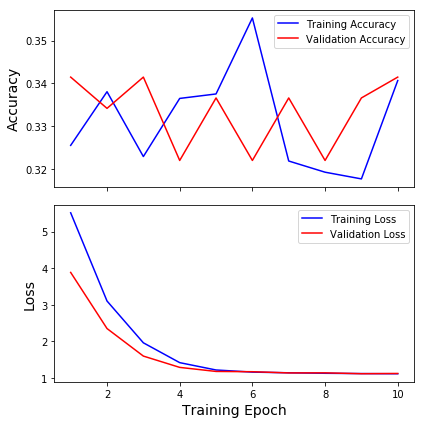

[io] Figure saved as results/model0A/model0A_keras_history  09-27-2019 17-16-37.png


------------------------------------------------------------------------------------------
	EVALUATE MODEL:
------------------------------------------------------------------------------------------

- Evaluating Training Data:
1911/1911 [==============================] - 1s 679us/step
    - Accuracy:0.3349
    - Loss:1.1184

- Evaluating Test Data:
409/409 [==============================] - 0s 853us/step
    - Accuracy:0.3178
    - Loss:1.1138

------------------------------------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       153
           1       0.32      1.00      0.48       130
           2       0.00      0.00      0.00       126

   micro avg       0.32      0.32      0

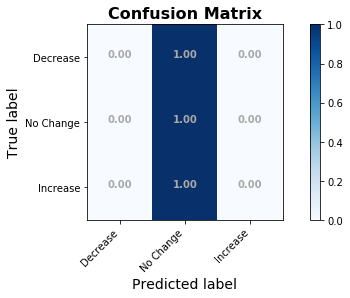

In [61]:
## set params
num_epochs = 10
# validation_split = 0.2


clock = bs.Clock()
clock.tic()
dashes = '---'*20
print(f"{dashes}\n\tFITTING MODEL:\n{dashes}")

history0_wv = model0_wv.fit(X_train, y_train, 
                      epochs=num_epochs,
                      verbose=True, 
                      validation_data=(X_val,y_val),#validation_split=validation_split,
                      batch_size=100)#,
#                       callbacks=callbacks)

clock.toc()

cm_fname = file_dict['model_0A']['fig_conf_mat.ext']
hist_fname = file_dict['model_0A']['fig_keras_history.ext']
summary_fname = file_dict['model_0A']['model_summary']

df_class_report0A_wv,fig0A_wv=ji.evaluate_classification(model0_wv,history0_wv,
                                                   X_train, X_test,
                                                   y_train, y_test, 
                                                   report_as_df=False,
                                                   binary_classes=False,
                                                   conf_matrix_classes=['Decrease','No Change','Increase'],
                                                   normalize_conf_matrix=True, 
                                                   save_history=True, history_filename=hist_fname,
                                                   save_conf_matrix_png=True, conf_mat_filename=cm_fname,
                                                   save_summary=True,summary_filename=summary_fname)


### Model 0 - GloVe

In [62]:
## MAKE GloVe EMBEDDING LAYER
# word2index, embedding_matrix_gl = ji.load_glove_embeddings(fp,encoding='utf-8',embedding_dim=100)

def load_glove_embedding_layer(fp=None, trainable=False):
    if fp is None:
        fp = r'D:\Users\James\Dropbox (Personal)\CODING\DATASETS\embeddings\glove.twitter.27B.100d.txt'

    ## Make GloVe embedding matrix
    word2index, embedding_matrix_gl = ji.load_glove_embeddings(fp=fp,encoding='utf-8',embedding_dim=100)
    print(f'gl:\n\tshape={embedding_matrix_gl.shape}')

    from keras import layers         
    vocab_size = embedding_matrix_gl.shape[0]#len(wv.vocab)
    vector_size = embedding_matrix_gl.shape[1]#wv.vector_size

    embedding_layer_gl =layers.Embedding(vocab_size,#+1,
                                      vector_size,
                                      input_length=X_train.shape[1],
                                      weights=[embedding_matrix_gl],
                                      trainable=trainable)
    return word2index, embedding_layer_gl

# glove_word2index, embedding_layer_gl = load_glove_embedding_layer(trainable=True)
glove_word2index, embedding_layer_gl = load_glove_embedding_layer(trainable=False)


gl:
	shape=(1193515, 100)


In [72]:
from keras import callbacks, models, layers, optimizers, regularizers
## Make model infrastructure:
model0_gl = models.Sequential()

## Get and add embedding_layer
model0_gl.add(embedding_layer_gl)
model0_gl.add(layers.SpatialDropout1D(0.2))

# model0_gl.add(layers.Bidirectional(layers.LSTM(units=100, return_sequences=True,
#                        dropout=0.5,recurrent_dropout=0.2,
#                        kernel_regularizer=regularizers.l2(.01))))
model0_gl.add(layers.Bidirectional(layers.LSTM(units=100, return_sequences=False)))#,
#                        dropout=0.5,recurrent_dropout=0.2)))#,
#                        kernel_regularizer=regularizers.l2(.01))))

model0_gl.add(layers.Dense(3, activation='softmax'))

model0_gl.compile(loss='categorical_crossentropy',optimizer="adadelta",metrics=['acc']) #optimizer=""rmsprop""
model0_gl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 33, 100)           119351500 
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 33, 100)           0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 603       
Total params: 119,512,903
Trainable params: 161,403
Non-trainable params: 119,351,500
_________________________________________________________________


--- CLOCK STARTED @:    09/27/19 - 05:28:52 PM --- 
------------------------------------------------------------
	FITTING MODEL:
------------------------------------------------------------
Train on 1911 samples, validate on 410 samples
Epoch 1/15
1911/1911 [==============================] - 8s 4ms/step - loss: 1.1177 - acc: 0.3412 - val_loss: 1.2469 - val_acc: 0.3366
Epoch 2/15
1911/1911 [==============================] - 6s 3ms/step - loss: 1.1137 - acc: 0.3585 - val_loss: 1.1307 - val_acc: 0.3293
Epoch 3/15
1911/1911 [==============================] - 5s 3ms/step - loss: 1.0996 - acc: 0.3574 - val_loss: 1.1051 - val_acc: 0.3268
Epoch 4/15
1911/1911 [==============================] - 6s 3ms/step - loss: 1.0922 - acc: 0.3773 - val_loss: 1.1735 - val_acc: 0.3317
Epoch 5/15
1911/1911 [==============================] - 5s 3ms/step - loss: 1.0918 - acc: 0.3830 - val_loss: 1.1159 - val_acc: 0.3244
Epoch 6/15
1911/1911 [==============================] - 6s 3ms/step - loss: 1.0886 - acc: 0.3

Lap #,Start Time,Duration,Label
TOTAL,09/27/19 - 05:28:52 PM,"1 min, 27.429 sec",--


------------------------------------------------------------------------------------------
	TRAINING HISTORY:
------------------------------------------------------------------------------------------


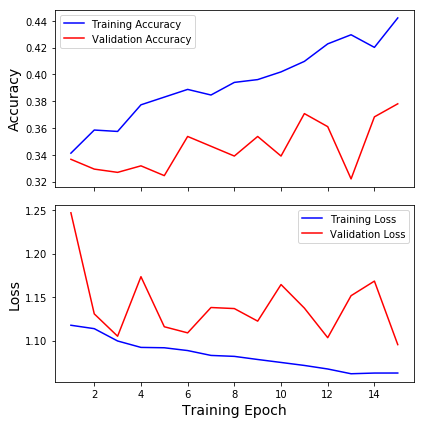

[io] Figure saved as results/model0A/model0A_keras_history  09-27-2019 17-30-19.png


------------------------------------------------------------------------------------------
	EVALUATE MODEL:
------------------------------------------------------------------------------------------

- Evaluating Training Data:
1911/1911 [==============================] - 1s 384us/step
    - Accuracy:0.4710
    - Loss:1.0364

- Evaluating Test Data:
409/409 [==============================] - 0s 384us/step
    - Accuracy:0.3667
    - Loss:1.0999

------------------------------------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.38      0.47      0.42       153
           1       0.36      0.42      0.39       130
           2       0.33      0.18      0.24       126

   micro avg       0.37      0.37      0

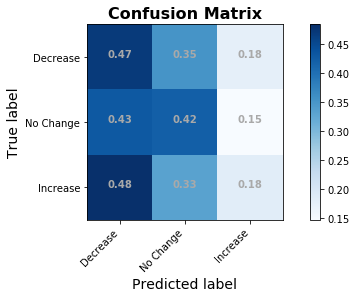

In [73]:
## set params
num_epochs = 15
# validation_split = 0.2
clock = bs.Clock()
clock.tic()
dashes = '---'*20
print(f"{dashes}\n\tFITTING MODEL:\n{dashes}")

history0_gl = model0_gl.fit(X_train, y_train, 
                      epochs=num_epochs,
                      verbose=True, 
                      validation_data=(X_val,y_val),#validation_split=validation_split,
                      batch_size=100)
                      

clock.toc()

cm_fname = file_dict['model_0A']['fig_conf_mat.ext']
hist_fname = file_dict['model_0A']['fig_keras_history.ext']
summary_fname = file_dict['model_0A']['model_summary']

df_class_report0A_gl,fig0A_gl=ji.evaluate_classification(model0_gl,history0_gl,
                                                   X_train, X_test,
                                                   y_train, y_test, 
                                                   report_as_df=False,
                                                   binary_classes=False,
                                                   conf_matrix_classes=['Decrease','No Change','Increase'],
                                                   normalize_conf_matrix=True, 
                                                   save_history=True, history_filename=hist_fname,
                                                   save_conf_matrix_png=True, conf_mat_filename=cm_fname,
                                                   save_summary=True,summary_filename=summary_fname)

In [232]:
y_pred_model0_gl = model0_gl.predict(X_test)

In [245]:
np.mean(np.array([0.47, 0.42, 0.18]))

0.35666666666666663

[0.47 0.42 0.18]
0.3322222222222222
Mean Class Accuracy = 0.3322222222222222


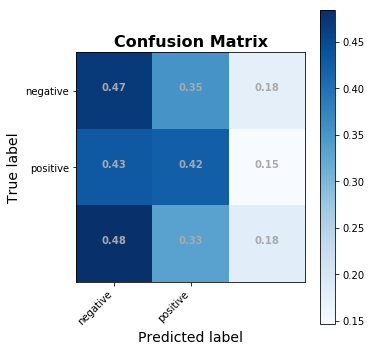

0.3322222222222222

In [244]:
my_custom_scorer(y_test, y_pred_model0_gl)
# np.mean[[0.47058824, 0.42307692 0.18253968]]

In [ ]:
def save_best_nlp_model(model):
    model_key='nlp_model_for_predictions'
    filename = file_dict[model_key]['base_filename']
    nlp_files = ji.save_model_weights_params(model0,check_if_exists=True,auto_increment_name=True, 
                                         auto_filename_suffix=True,filename_prefix=filename)
    return nlp_files


In [ ]:
save_me_as_model_0A=True
save_me_as_pred_nlp = False

ji.reload(ji)
if save_me_as_pred_nlp:
    model_key='nlp_model_for_predictions'

elif save_me_as_model_0A:
    model_key='model_0A'    
    
filename = file_dict[model_key]['base_filename']
nlp_files = ji.save_model_weights_params(model0_gl,check_if_exists=True,auto_increment_name=True, 
                                         auto_filename_suffix=True,filename_prefix=filename)

file_dict[model_key]['output_filenames'] = nlp_files

ji.update_file_directory(file_dict)

### Kera's Example Pretrained Word Embeddings Network

#### CNN Parameters 
https://machinelearningmastery.com/best-practices-document-classification-deep-learning/

- See notebook `keras_hyperparameter_tuning.ipynb`for gridsearch

```python
# Create HyperParaemeter Space
params_to_search ={'filter_size':[3,4,5,6],
                   'activation':['relu','tanh','linear'],
                   'n_filters':[100,200],#,300,400],
                  'dropout':[0.2],
                  'optimizer':['adam','rmsprop','adadelta'],
                'epochs':[10]}


create_model(embedding_layer=embedding_layer_gl,trainable=False,
              n_filters=100, filter_size=4,
              activation='tanh', optimizer='adadelta',
              dropout=0.2,l2_lr=0.01,
              batch_size=100,
              epochs=10,verbose = 0,show_summary=False)
best results={'activation': 'tanh', 
              'dropout': 0.2,
              'epochs': 10,
              'filter_size': 4,
              'n_filters': 100,
              'optimizer': 'adadelta'}
```

##### Things to Try:
1. Weight Regularization (L2):3 
2. Adadelta Optimizer

In [92]:
params_to_search ={'filter_size':[3,4,5,6],
                   'activation':['relu','tanh','linear'],
                   'n_filters':[100,200],#,300,400],
                  'dropout':[0.2],
                  'optimizer':['adam','rmsprop','adadelta'],
                'epochs':[10]}

def model_cnn(embedding_layer, X_train, X_test,
              y_train,y_test,
              X_val, y_val,
              n_filters=128, filter_size=4,
              activation='relu', optimizer='rmsprop',
              dropout=0.2,l2_lr=0.01,
              batch_size=128,
              epochs=10,verbose = 1,trainable_embedding=False,show_summary=False):
    
    from keras.layers import Input, Conv1D,GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout
    from keras.models import Model
    from keras.regularizers import l2
    embedding_layer.trainable=trainable_embedding
    print(f'Embedding layer trainable={embedding_layer.trainable}')

    print('Training model.')
    MAX_SEQUENCE_LENGTH = X_train.shape[1]

    # train a 1D convnet with global maxpooling
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer_gl(sequence_input)
    ## Specify layer parameters


    ##
    x = Conv1D(n_filters, filter_size, activation=activation, data_format='channels_first',
               kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(embedded_sequences)
    
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    ##
    x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
              kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    ##
    x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
              kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
    x = Dropout(dropout)(x)
    x = GlobalMaxPooling1D()(x)
    
    ##
    x = Dense(n_filters, activation='relu')(x) #128
    preds = Dense(3, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, #'rmsprop',#adam
                  metrics=['acc'])
    
    if show_summary:
        display(model.summary())
    
    
    
    clock = bs.Clock()
    clock.tic(f'units={n_filters}, filter={filter_size},dropout={dropout},opt={optimizer}')
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,verbose=verbose,
                        validation_data=(X_val,y_val))

              #validation_split=0.1)
    clock.toc('')
    df_class_report0_CNN,fig0_CNN=ji.evaluate_classification(model,history,
                                                       X_train, X_test,
                                                       y_train, y_test, 
                                                       report_as_df=False,
                                                       binary_classes=False,
                                                       conf_matrix_classes=['Decrease','No Change','Increase'],
                                                       normalize_conf_matrix=True)
    
    return model, df_class_report0_CNN

In [99]:
## Get a trainable embedding_layer with GloVe Emebddings
_,embedding_layer_gl=load_glove_embedding_layer(trainable=False)


## Save the initial weights before any training
gl_initial_weights = embedding_layer_gl.get_weights()

gl:
	shape=(1193515, 100)


Embedding layer trainable=False
Training model.
--- CLOCK STARTED @:    09/28/19 - 01:05:46 AM           Label: units=100, filter=4,dropout=0.2,opt=adadelta --- 
Train on 1911 samples, validate on 410 samples
Epoch 1/10
1911/1911 [==============================] - 5s 3ms/step - loss: 1.7022 - acc: 0.3302 - val_loss: 1.6376 - val_acc: 0.3561
Epoch 2/10
1911/1911 [==============================] - 2s 953us/step - loss: 1.6008 - acc: 0.3250 - val_loss: 1.5499 - val_acc: 0.3171
Epoch 3/10
1911/1911 [==============================] - 2s 944us/step - loss: 1.5116 - acc: 0.3527 - val_loss: 1.4720 - val_acc: 0.3463
Epoch 4/10
1911/1911 [==============================] - 2s 936us/step - loss: 1.4470 - acc: 0.3375 - val_loss: 1.4196 - val_acc: 0.3293
Epoch 5/10
1911/1911 [==============================] - 2s 990us/step - loss: 1.3901 - acc: 0.3349 - val_loss: 1.3598 - val_acc: 0.3463
Epoch 6/10
1911/1911 [==============================] - 2s 983us/step - loss: 1.3383 - acc: 0.3522 - val_loss: 1.

Lap #,Start Time,Duration,Label
TOTAL,09/28/19 - 01:05:46 AM,"0 min, 22.179 sec",


------------------------------------------------------------------------------------------
	TRAINING HISTORY:
------------------------------------------------------------------------------------------


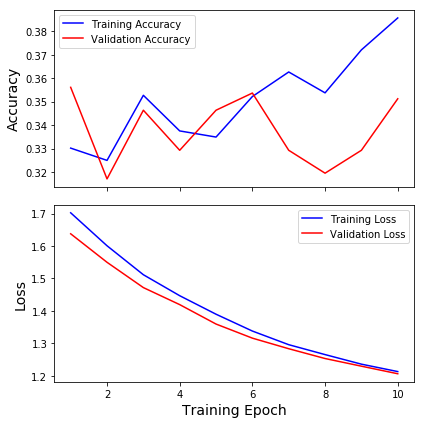



------------------------------------------------------------------------------------------
	EVALUATE MODEL:
------------------------------------------------------------------------------------------

- Evaluating Training Data:
1911/1911 [==============================] - 1s 392us/step
    - Accuracy:0.4600
    - Loss:1.1982

- Evaluating Test Data:
409/409 [==============================] - 0s 425us/step
    - Accuracy:0.3839
    - Loss:1.2057

------------------------------------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.41      0.35      0.38       153
           1       0.37      0.41      0.39       130
           2       0.37      0.40      0.39       126

   micro avg       0.38      0.38      0.38       409
   macro avg       0.38      0.39      0.38       409
weighted avg    

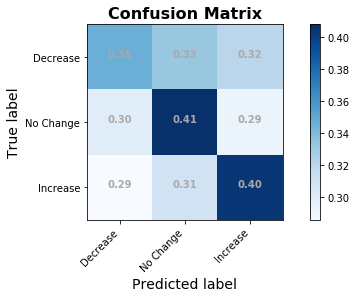

In [104]:
## Use results from grid search
best_results={'activation': 'tanh', 
              'dropout': 0.2,
              'epochs': 10,
              'filter_size': 4,
              'n_filters': 100,
              'optimizer': 'adadelta'}
outputs= model_cnn(embedding_layer_gl,
                   X_train, X_test,
                   y_train, y_test, 
                   X_val,y_val,l2_lr=0.005,
                   trainable_embedding=False,
                   
                   **best_results)

In [117]:



def create_model(embedding_layer=embedding_layer_gl,trainable=False,
              n_filters=128, filter_size=4,
              activation='relu', optimizer='rmsprop',
              dropout=0.2,l2_lr=0.01,
              batch_size=100,
              epochs=10,verbose = 0,show_summary=False):
    
    embedding_layer.trainable=trainable
    print(f'Embedding layer trainable={embedding_layer.trainable}')
    from keras.layers import Input, Conv1D,GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout
    from keras.models import Model
    from keras.regularizers import l2

    print('Training model.')
    MAX_SEQUENCE_LENGTH = X_train.shape[1]

    # train a 1D convnet with global maxpooling
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    ## Specify layer parameters


    ##
    x = Conv1D(n_filters, filter_size, activation=activation, data_format='channels_first',
               kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(embedded_sequences)
    
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    ##
    x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
              kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    ##
    x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
              kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
    x = Dropout(dropout)(x)
    x = GlobalMaxPooling1D()(x)
    
    ##
    x = Dense(n_filters, activation=activation )(x) #128'relu'
    preds = Dense(3, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, #'rmsprop',#adam
                  metrics=['acc'])
    
    if show_summary:
        display(model.summary())
    return model



In [206]:
def fit_model(model,X_train,y_train,batch_size,epochs,verbose,validation_data):
    
    clock = bs.Clock()
#     clock.tic(f'units={n_filters}, filter={filter_size},dropout={dropout},opt={optimizer}')
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,verbose=verbose,
                        validation_data=(X_val,y_val))

              #validation_split=0.1)
    clock.toc('')
    df_class_report0_CNN,fig0_CNN=ji.evaluate_classification(model,history,
                                                       X_train, X_test,
                                                       y_train, y_test, 
                                                       report_as_df=False,
                                                       binary_classes=False,
                                                       conf_matrix_classes=['Decrease','No Change','Increase'],
                                                       normalize_conf_matrix=True)
    
    return model, df_class_report0_CNN

In [259]:
def my_custom_scorer(y_true,y_pred, model=None, **kwargs):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""
    from sklearn.metrics import make_scorer,confusion_matrix
    
    # set labels if provided
    if 'labels' in kwargs:
        labels = kwargs['labels']
    else:
        labels=np.unique(y_true)
    
    if y_true.ndim>1 or y_pred.ndim>1:
    
        ## reduce dimensions of y_train and y_test
        if y_true.ndim>1:            
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)
            
    # Get confusion matrx
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize confusion matrix
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    
    ## Get diagonals for class accuracy
    diag = cm_norm.diagonal()
    score = np.mean(diag)
    print(f'Mean Class Accuracy = {score}')
    print(f'Class Accuracy Values:')
    print(diag)    
    
    
    ji.plot_confusion_matrix(cm,normalize=True)
    
    return score

Mean Class Accuracy = 0.35873494697024105
Class Accuracy Values:
[0.47058824 0.42307692 0.18253968]


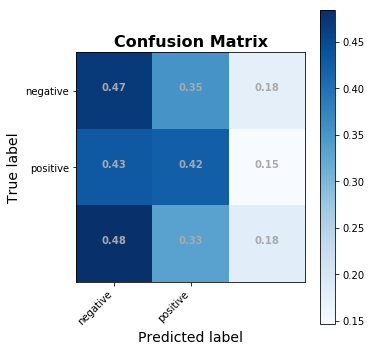

[[0.47058824 0.35294118 0.17647059]
 [0.43076923 0.42307692 0.14615385]
 [0.48412698 0.33333333 0.18253968]] (3, 3)


In [258]:
y_pred_model0_gl = model0_gl.predict(X_test)
score, cm_norm = my_custom_scorer(y_test,y_pred_model0_gl)
print(cm_norm, cm_norm.shape)

--- CLOCK STARTED @:    09/29/19 - 11:03:49 AM --- 
Embedding layer trainable=False
Training model.
Epoch 1/10
 - 128s - loss: 1.7908 - acc: 0.3163
Epoch 2/10
 - 7s - loss: 1.5691 - acc: 0.3422
Epoch 3/10
 - 7s - loss: 1.4287 - acc: 0.3257
Epoch 4/10
 - 7s - loss: 1.3349 - acc: 0.3367
Epoch 5/10
 - 7s - loss: 1.2700 - acc: 0.3289
Epoch 6/10
 - 7s - loss: 1.2286 - acc: 0.3171
Epoch 7/10
 - 7s - loss: 1.1825 - acc: 0.3359
Epoch 8/10
 - 7s - loss: 1.1662 - acc: 0.3336
Epoch 9/10
 - 7s - loss: 1.1443 - acc: 0.3446
Epoch 10/10
 - 7s - loss: 1.1385 - acc: 0.3203
Mean Class Accuracy = 0.3333333333333333
Class Accuracy Values:
[0. 1. 0.]


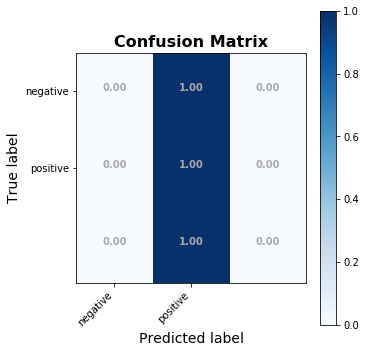

Mean Class Accuracy = 0.3333333333333333
Class Accuracy Values:
[0. 1. 0.]


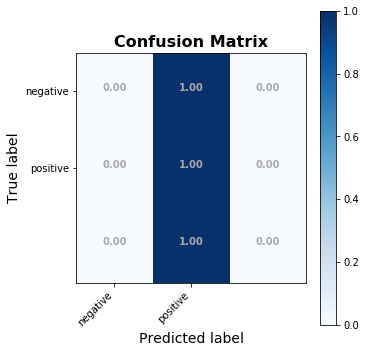

Embedding layer trainable=False
Training model.
Epoch 1/10
 - 114s - loss: 1.7151 - acc: 0.3163
Epoch 2/10
 - 7s - loss: 1.5895 - acc: 0.3234
Epoch 3/10
 - 7s - loss: 1.4518 - acc: 0.3414
Epoch 4/10
 - 7s - loss: 1.3657 - acc: 0.3289
Epoch 5/10
 - 7s - loss: 1.2995 - acc: 0.3469
Epoch 6/10
 - 7s - loss: 1.2501 - acc: 0.3658
Epoch 7/10
 - 7s - loss: 1.2322 - acc: 0.3179
Epoch 8/10
 - 7s - loss: 1.1913 - acc: 0.3203
Epoch 9/10
 - 7s - loss: 1.1527 - acc: 0.3705
Epoch 10/10
 - 7s - loss: 1.1538 - acc: 0.3414
Mean Class Accuracy = 0.33169129720853857
Class Accuracy Values:
[0.         0.99507389 0.        ]


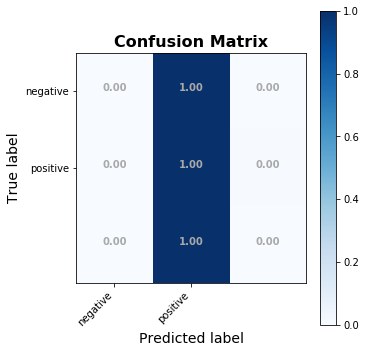

Mean Class Accuracy = 0.33735909822866345
Class Accuracy Values:
[0.         1.         0.01207729]


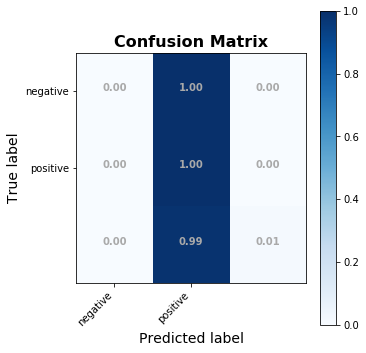

Embedding layer trainable=False
Training model.
Epoch 1/10
 - 121s - loss: 1.7414 - acc: 0.3210
Epoch 2/10
 - 7s - loss: 1.5716 - acc: 0.3414
Epoch 3/10
 - 7s - loss: 1.4700 - acc: 0.3524
Epoch 4/10
 - 7s - loss: 1.3802 - acc: 0.3281
Epoch 5/10
 - 7s - loss: 1.3208 - acc: 0.3265
Epoch 6/10
 - 7s - loss: 1.2467 - acc: 0.3603
Epoch 7/10
 - 7s - loss: 1.2106 - acc: 0.3697
Epoch 8/10
 - 7s - loss: 1.1871 - acc: 0.3469
Epoch 9/10
 - 7s - loss: 1.1620 - acc: 0.3721
Epoch 10/10
 - 7s - loss: 1.1480 - acc: 0.3799
Mean Class Accuracy = 0.3453149001536098
Class Accuracy Values:
[0.01428571 0.92165899 0.1       ]


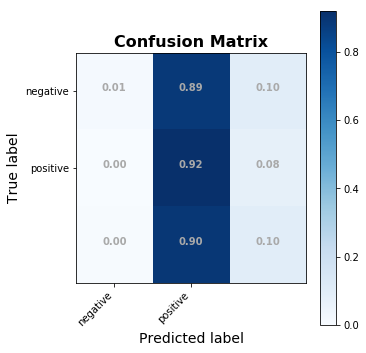

Mean Class Accuracy = 0.39604370155922447
Class Accuracy Values:
[0.02168675 0.96690307 0.19954128]


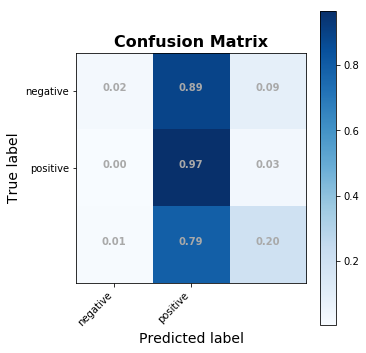

Embedding layer trainable=False
Training model.
Epoch 1/10
 - 143s - loss: 2.4381 - acc: 0.3132
Epoch 2/10
 - 24s - loss: 2.0088 - acc: 0.3336
Epoch 3/10
 - 24s - loss: 1.7430 - acc: 0.3516
Epoch 4/10
 - 26s - loss: 1.5493 - acc: 0.3407
Epoch 5/10
 - 23s - loss: 1.4153 - acc: 0.3336
Epoch 6/10
 - 23s - loss: 1.3114 - acc: 0.3705
Epoch 7/10
 - 25s - loss: 1.2412 - acc: 0.3626
Epoch 8/10
 - 24s - loss: 1.1976 - acc: 0.3736
Epoch 9/10
 - 23s - loss: 1.1568 - acc: 0.3783
Epoch 10/10
 - 27s - loss: 1.1412 - acc: 0.4035
Mean Class Accuracy = 0.31124040738788045
Class Accuracy Values:
[0.00938967 0.02727273 0.89705882]


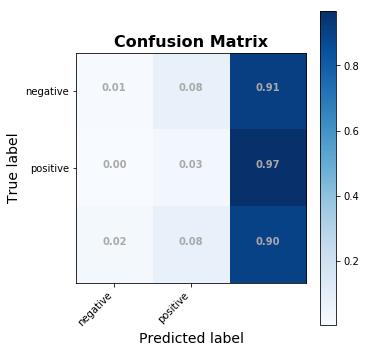

Mean Class Accuracy = 0.3672466248137293
Class Accuracy Values:
[0.02912621 0.0952381  0.97737557]


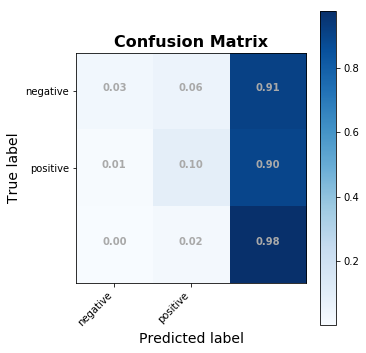

Embedding layer trainable=False
Training model.
Epoch 1/10
 - 133s - loss: 2.4580 - acc: 0.3540
Epoch 2/10
 - 23s - loss: 1.9999 - acc: 0.3289
Epoch 3/10
 - 23s - loss: 1.7351 - acc: 0.3352
Epoch 4/10
 - 23s - loss: 1.5453 - acc: 0.3328
Epoch 5/10
 - 26s - loss: 1.4085 - acc: 0.3438
Epoch 6/10
 - 23s - loss: 1.3104 - acc: 0.3336
Epoch 7/10
 - 23s - loss: 1.2383 - acc: 0.3493
Epoch 8/10
 - 23s - loss: 1.1903 - acc: 0.3524
Epoch 9/10
 - 23s - loss: 1.1551 - acc: 0.3846
Epoch 10/10
 - 24s - loss: 1.1340 - acc: 0.3878
Mean Class Accuracy = 0.3417568973646133
Class Accuracy Values:
[0.0049505  0.95566502 0.06465517]


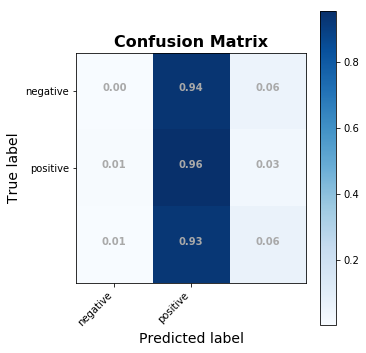

Mean Class Accuracy = 0.3808265395733141
Class Accuracy Values:
[0.03073286 0.98855835 0.12318841]


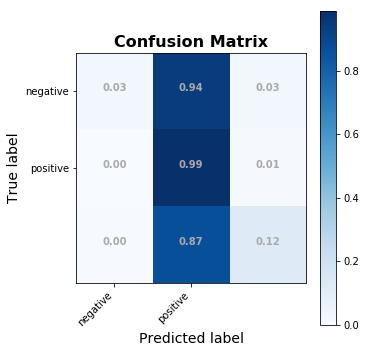

Embedding layer trainable=False
Training model.
Epoch 1/10
 - 142s - loss: 2.4056 - acc: 0.3383
Epoch 2/10
 - 24s - loss: 1.9802 - acc: 0.3297
Epoch 3/10
 - 24s - loss: 1.7053 - acc: 0.3407
Epoch 4/10
 - 25s - loss: 1.5191 - acc: 0.3195
Epoch 5/10
 - 27s - loss: 1.3826 - acc: 0.3454
Epoch 6/10
 - 24s - loss: 1.2924 - acc: 0.3297
Epoch 7/10
 - 24s - loss: 1.2255 - acc: 0.3140
Epoch 8/10
 - 29s - loss: 1.1798 - acc: 0.3352
Epoch 9/10
 - 26s - loss: 1.1492 - acc: 0.3721
Epoch 10/10
 - 25s - loss: 1.1311 - acc: 0.3359
Mean Class Accuracy = 0.3408090117767537
Class Accuracy Values:
[0.         0.04147465 0.98095238]


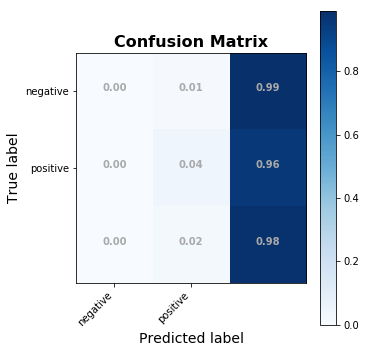

Mean Class Accuracy = 0.3326392955516516
Class Accuracy Values:
[0.         0.0070922  0.99082569]


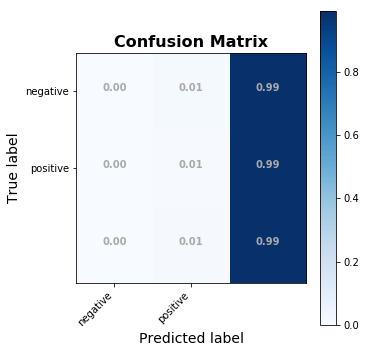

Embedding layer trainable=False
Training model.
Epoch 1/10
 - 145s - loss: 1.5038 - acc: 0.3352
Epoch 2/10
 - 9s - loss: 1.4371 - acc: 0.3469
Epoch 3/10
 - 9s - loss: 1.4380 - acc: 0.3485
Epoch 4/10
 - 9s - loss: 1.3866 - acc: 0.3210
Epoch 5/10
 - 9s - loss: 1.3195 - acc: 0.3414
Epoch 6/10
 - 9s - loss: 1.2813 - acc: 0.3556
Epoch 7/10
 - 8s - loss: 1.2553 - acc: 0.3728
Epoch 8/10
 - 9s - loss: 1.2296 - acc: 0.3862
Epoch 9/10
 - 9s - loss: 1.2066 - acc: 0.3697
Epoch 10/10
 - 9s - loss: 1.1872 - acc: 0.4035
Mean Class Accuracy = 0.3711656749767769
Class Accuracy Values:
[0.05164319 0.33636364 0.7254902 ]


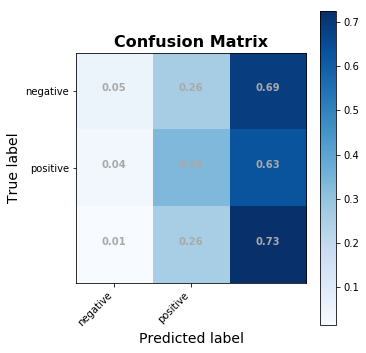

Mean Class Accuracy = 0.5309840391222459
Class Accuracy Values:
[0.10679612 0.63095238 0.85520362]


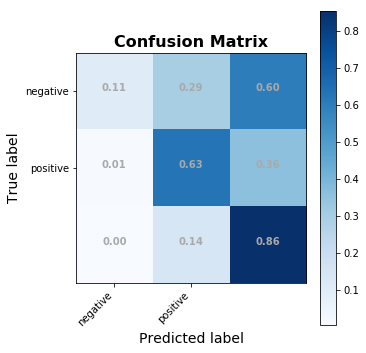

Embedding layer trainable=False
Training model.
Epoch 1/10
 - 137s - loss: 1.5861 - acc: 0.2959
Epoch 2/10
 - 8s - loss: 1.4541 - acc: 0.3320
Epoch 3/10
 - 8s - loss: 1.3906 - acc: 0.3124
Epoch 4/10
 - 8s - loss: 1.3142 - acc: 0.3540
Epoch 5/10
 - 8s - loss: 1.2770 - acc: 0.3587
Epoch 6/10
 - 8s - loss: 1.2504 - acc: 0.3210
Epoch 7/10
 - 8s - loss: 1.2212 - acc: 0.3375
Epoch 8/10
 - 8s - loss: 1.1872 - acc: 0.3509
Epoch 9/10
 - 8s - loss: 1.1753 - acc: 0.3297
Epoch 10/10
 - 8s - loss: 1.1613 - acc: 0.3454
Mean Class Accuracy = 0.3333333333333333
Class Accuracy Values:
[0. 0. 1.]


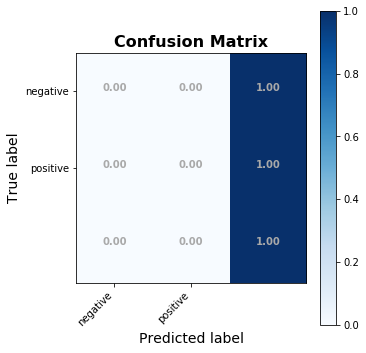

Mean Class Accuracy = 0.3333333333333333
Class Accuracy Values:
[0. 0. 1.]


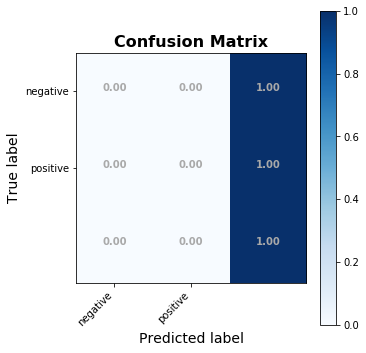

Embedding layer trainable=False
Training model.
Epoch 1/10
 - 126s - loss: 1.4943 - acc: 0.3148
Epoch 2/10
 - 8s - loss: 1.4301 - acc: 0.3454
Epoch 3/10
 - 7s - loss: 1.3939 - acc: 0.3312
Epoch 4/10
 - 7s - loss: 1.3897 - acc: 0.3265
Epoch 5/10
 - 8s - loss: 1.3243 - acc: 0.3414
Epoch 6/10
 - 7s - loss: 1.2968 - acc: 0.3603
Epoch 7/10
 - 7s - loss: 1.2612 - acc: 0.3650
Epoch 8/10
 - 7s - loss: 1.2295 - acc: 0.3878
Epoch 9/10
 - 7s - loss: 1.2117 - acc: 0.3744
Epoch 10/10
 - 7s - loss: 1.1792 - acc: 0.4239
Mean Class Accuracy = 0.35873015873015873
Class Accuracy Values:
[0.15714286 0.         0.91904762]


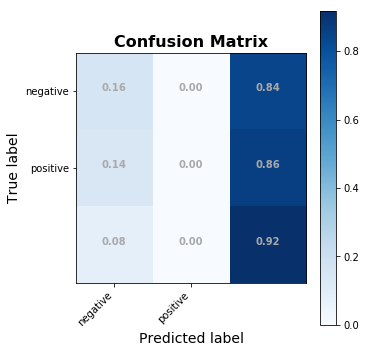

Mean Class Accuracy = 0.3922092037876275
Class Accuracy Values:
[0.23855422 0.         0.93807339]


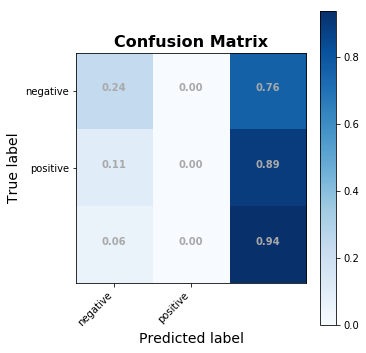

Embedding layer trainable=False
Training model.
Epoch 1/10


KeyboardInterrupt: 

In [260]:
from sklearn.model_selection import GridSearchCV
tune_clock = bs.Clock()
from keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

neural_network = KerasClassifier(build_fn=create_model,verbose=2)    

best_results={'activation': ['tanh'], 
              'dropout': [0.2],
              'epochs': [10,15],#,20]
              'filter_size': [4,7],
              'batch_size':[50,100,300],
              'n_filters': [100,300],
              'optimizer': ['adadelta'],
             'l2_lr':[0.005,0.003,0.03]}
grid = GridSearchCV(estimator=neural_network,param_grid=best_results,scoring=make_scorer(my_custom_scorer))

tune_clock.tic()
grid_result = grid.fit(X_train, y_train)
tune_clock.toc()

In [ ]:
grid.best_params_

- REsults from overnight gridsearch
-params ran:
```python
params={'activation': ['tanh'], 
              'dropout': [0.2],
              'epochs': [10,15],#,20]
              'filter_size': [4,7],
              'batch_size':[50,100,300],
              'n_filters': [100,300],
              'optimizer': ['adadelta'],
             'l2_lr':[0.005,0.003,0.03]}
```
- best _params

```python

{'activation': 'tanh',
 'batch_size': 100,
 'dropout': 0.2,
 'epochs': 10,
 'filter_size': 4,
 'l2_lr': 0.005,
 'n_filters': 100,
 'optimizer': 'adadelta'}
```

Embedding layer trainable=False
Training model.
--- CLOCK STARTED @:    09/28/19 - 01:14:47 PM           Label: units=100, filter=4,dropout=0.2,opt=adadelta --- 
Train on 1911 samples, validate on 410 samples
Epoch 1/10
1911/1911 [==============================] - 84s 44ms/step - loss: 1.7358 - acc: 0.3103 - val_loss: 1.6519 - val_acc: 0.3415
Epoch 2/10
1911/1911 [==============================] - 6s 3ms/step - loss: 1.6116 - acc: 0.3443 - val_loss: 1.5673 - val_acc: 0.3293
Epoch 3/10
1911/1911 [==============================] - 6s 3ms/step - loss: 1.5365 - acc: 0.3286 - val_loss: 1.4980 - val_acc: 0.3415
Epoch 4/10
1911/1911 [==============================] - 6s 3ms/step - loss: 1.4655 - acc: 0.3621 - val_loss: 1.4358 - val_acc: 0.3244
Epoch 5/10
1911/1911 [==============================] - 6s 3ms/step - loss: 1.4107 - acc: 0.3543 - val_loss: 1.3876 - val_acc: 0.3683
Epoch 6/10
1911/1911 [==============================] - 5s 3ms/step - loss: 1.3602 - acc: 0.3794 - val_loss: 1.3478 - v

Lap #,Start Time,Duration,Label
TOTAL,09/28/19 - 01:14:47 PM,"2 min, 17.246 sec",


------------------------------------------------------------------------------------------
	TRAINING HISTORY:
------------------------------------------------------------------------------------------


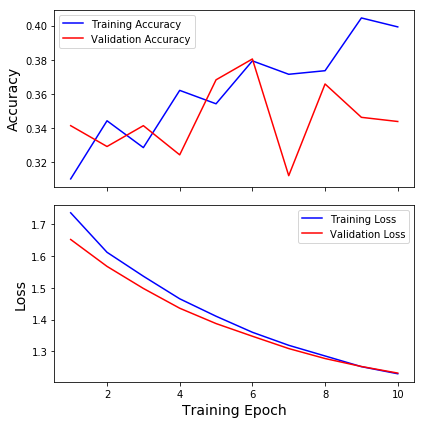



------------------------------------------------------------------------------------------
	EVALUATE MODEL:
------------------------------------------------------------------------------------------

- Evaluating Training Data:
1911/1911 [==============================] - 6s 3ms/step
    - Accuracy:0.4893
    - Loss:1.2101

- Evaluating Test Data:
409/409 [==============================] - 1s 3ms/step
    - Accuracy:0.3594
    - Loss:1.2309

------------------------------------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.39      0.50      0.44       153
           1       0.37      0.28      0.32       130
           2       0.30      0.27      0.29       126

   micro avg       0.36      0.36      0.36       409
   macro avg       0.35      0.35      0.35       409
weighted avg       0

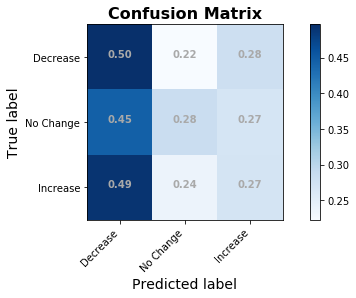

In [125]:
## Use results from grid search
best_results={'activation': 'tanh', 
              'dropout': 0.2,
              'epochs': 10,
              'filter_size': 4,
              'n_filters': 100,
              'l2_lr':0.005,
              'optimizer': 'adadelta'}
outputs= model_cnn(embedding_layer_gl,
                   X_train, X_test,
                   y_train, y_test, 
                   X_val,y_val,
                   trainable_embedding=False,
                   **best_results)

In [207]:
# help(GridSearchCV)

In [164]:
print(pd.datetime.now())

2019-09-28 13:37:28.541466


# BOOKMARK 09/28/19

In [190]:

def create_deep_model(embedding_layer=embedding_layer_gl,trainable=False,
                       n_conv_layers=3,n_filters=128, filter_size=4,
                      activation='tanh', optimizer='adadelta',
                      dropout=0.2,l2_lr=0.005,
                      batch_size=100,
                      epochs=10,verbose = 1):
    
    ## Print out parameters used to create model
    vars = locals()
    dashes = '---'*20
    print('\n\n')
    print(dashes)
    now = pd.datetime.now()
    print(now.strftime('%m/%d/%Y-%T'))
    print(vars)    
    
    embedding_layer.trainable=trainable
    print(f'Embedding layer trainable={embedding_layer.trainable}')
    from keras.layers import Input, Conv1D,GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout
    from keras.models import Model
    from keras.regularizers import l2

    print('Training model.')
    MAX_SEQUENCE_LENGTH = X_train.shape[1]

    # train a 1D convnet with global maxpooling
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    ## Specify layer parameters


    ##
    x = Conv1D(n_filters, filter_size, activation=activation, #data_format='channels_first',
               kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(embedded_sequences)
    
    x = Dropout(dropout)(x)
    x = MaxPooling1D(filter_size)(x)
    
    
    
    ## Loop to create n_conv_layers
    
    for n in range(n_conv_layers):
        x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
                   kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
        x = Dropout(dropout)(x)
        
        if n==n_conv_layers-1:
            x = GlobalMaxPooling1D()(x)
        else:
            x = MaxPooling1D(filter_size)(x)
    
# #     ##
#     x = Conv1D(n_filters, filter_size, activation=activation,data_format='channels_first',
#               kernel_regularizer=l2(l2_lr), bias_regularizer=l2(l2_lr))(x) 
#     x = Dropout(dropout)(x)
#     x = GlobalMaxPooling1D()(x)
    
    ##
    x = Dense(n_filters, activation=activation )(x) #128'relu'
    preds = Dense(3, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer, #'rmsprop',#adam
                  metrics=['acc'])
    
#     if show_summary:
#     print()
    display(model.summary())
    return model



In [191]:
from sklearn.model_selection import GridSearchCV
tune_clock = bs.Clock()
from keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

neural_network_deep = KerasClassifier(build_fn=create_deep_model,verbose=1)

params_deep_model={'n_conv_layers':[3,5],
                  'n_filters': [100,200],
                 'l2_lr':[0.005,0.01],
                  'epochs':[10]}
# params_deep_model={'activation': ['tanh'], 
#                    'n_conv_layers':[3,5],
#                   'dropout': [0.2],
#                   'epochs': [10],#,20]
#                   'filter_size': [4],
#                   'batch_size':[100],
#                   'n_filters': [100,200],
#                   'optimizer': ['adadelta'],
#                  'l2_lr':[0.005,0.01]}
grid = GridSearchCV(estimator=neural_network_deep,param_grid=params_deep_model)#,
#                    n_jobs=3)
print(params_deep_model)

tune_clock.tic()
grid_result = grid.fit(X_train, y_train)
tune_clock.toc()

{'n_conv_layers': [3, 5], 'n_filters': [100, 200], 'l2_lr': [0.005, 0.01], 'epochs': [10]}
--- CLOCK STARTED @:    09/28/19 - 03:17:17 PM --- 



------------------------------------------------------------
09/28/2019-15:17:17
{'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'tanh', 'filter_size': 4, 'n_filters': 100, 'n_conv_layers': 3, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000014568D0E860>}
Embedding layer trainable=False
Training model.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_279 (InputLayer)       (None, 33)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 33, 100)           119351500 
_________________________________________________________________
conv1d_885 (Conv1D)          (None, 30, 1

None

Epoch 1/10
1274/1274 [==============================] - 104s 82ms/step - loss: 1.9179 - acc: 0.3375
Epoch 2/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.6403 - acc: 0.3501
Epoch 3/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.4716 - acc: 0.3375
Epoch 4/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.3545 - acc: 0.3509
Epoch 5/10
1274/1274 [==============================] - 12s 10ms/step - loss: 1.2733 - acc: 0.3438
Epoch 6/10
1274/1274 [==============================] - 12s 9ms/step - loss: 1.2174 - acc: 0.3375
Epoch 7/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.1764 - acc: 0.3422
Epoch 8/10
1274/1274 [==============================] - 13s 10ms/step - loss: 1.1477 - acc: 0.3681
Epoch 9/10
1274/1274 [==============================] - 14s 11ms/step - loss: 1.1288 - acc: 0.3705
Epoch 10/10
1274/1274 [==============================] - 5s 4ms/step



-----------------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 101s 79ms/step - loss: 1.9134 - acc: 0.3297
Epoch 2/10
1274/1274 [==============================] - 12s 9ms/step - loss: 1.6369 - acc: 0.3305
Epoch 3/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.4581 - acc: 0.3414
Epoch 4/10
1274/1274 [==============================] - 12s 9ms/step - loss: 1.3405 - acc: 0.3328
Epoch 5/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.2589 - acc: 0.3344
Epoch 6/10
1274/1274 [==============================] - 12s 9ms/step - loss: 1.2013 - acc: 0.3320
Epoch 7/10
1274/1274 [==============================] - 12s 9ms/step - loss: 1.1624 - acc: 0.3626
Epoch 8/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.1346 - acc: 0.3815
Epoch 9/10
1274/1274 [==============================] - 13s 10ms/step - loss: 1.1162 - acc: 0.4388
Epoch 10/10
1274/1274 [==============================] - 6s 5ms/step



-------------------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 107s 84ms/step - loss: 1.8958 - acc: 0.3320
Epoch 2/10
1274/1274 [==============================] - 12s 9ms/step - loss: 1.6061 - acc: 0.3226
Epoch 3/10
1274/1274 [==============================] - 12s 9ms/step - loss: 1.4272 - acc: 0.3626
Epoch 4/10
1274/1274 [==============================] - 12s 9ms/step - loss: 1.3147 - acc: 0.3540
Epoch 5/10
1274/1274 [==============================] - 12s 9ms/step - loss: 1.2404 - acc: 0.3603
Epoch 6/10
1274/1274 [==============================] - 12s 9ms/step - loss: 1.1886 - acc: 0.3595
Epoch 7/10
1274/1274 [==============================] - 12s 9ms/step - loss: 1.1548 - acc: 0.3713
Epoch 8/10
1274/1274 [==============================] - 12s 9ms/step - loss: 1.1339 - acc: 0.3885
Epoch 9/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.1121 - acc: 0.4246
Epoch 10/10
1274/1274 [==============================] - 5s 4ms/step



--------------------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 127s 100ms/step - loss: 2.3281 - acc: 0.3516
Epoch 2/10
1274/1274 [==============================] - 32s 25ms/step - loss: 1.8296 - acc: 0.3367
Epoch 3/10
1274/1274 [==============================] - 32s 25ms/step - loss: 1.5331 - acc: 0.3305
Epoch 4/10
1274/1274 [==============================] - 32s 25ms/step - loss: 1.3482 - acc: 0.3407
Epoch 5/10
1274/1274 [==============================] - 32s 25ms/step - loss: 1.2385 - acc: 0.3516
Epoch 6/10
1274/1274 [==============================] - 37s 29ms/step - loss: 1.1719 - acc: 0.3469
Epoch 7/10
1274/1274 [==============================] - 36s 29ms/step - loss: 1.1353 - acc: 0.3383
Epoch 8/10
1274/1274 [==============================] - 35s 28ms/step - loss: 1.1172 - acc: 0.3344
Epoch 9/10
1274/1274 [==============================] - 33s 26ms/step - loss: 1.1082 - acc: 0.3289
Epoch 10/10
1274/1274 [==============================] - 11s 9ms/step



----------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 124s 98ms/step - loss: 2.3012 - acc: 0.3352
Epoch 2/10
1274/1274 [==============================] - 29s 23ms/step - loss: 1.7932 - acc: 0.3352
Epoch 3/10
1274/1274 [==============================] - 29s 23ms/step - loss: 1.4978 - acc: 0.3250
Epoch 4/10
1274/1274 [==============================] - 31s 24ms/step - loss: 1.3194 - acc: 0.3289
Epoch 5/10
1274/1274 [==============================] - 29s 23ms/step - loss: 1.2143 - acc: 0.3375
Epoch 6/10
1274/1274 [==============================] - 29s 23ms/step - loss: 1.1576 - acc: 0.3265
Epoch 7/10
1274/1274 [==============================] - 29s 23ms/step - loss: 1.1280 - acc: 0.3336
Epoch 8/10
1274/1274 [==============================] - 29s 23ms/step - loss: 1.1120 - acc: 0.3312
Epoch 9/10
1274/1274 [==============================] - 30s 23ms/step - loss: 1.1054 - acc: 0.3265
Epoch 10/10
1274/1274 [==============================] - 10s 8ms/step



-----------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 117s 92ms/step - loss: 2.3225 - acc: 0.3407
Epoch 2/10
1274/1274 [==============================] - 28s 22ms/step - loss: 1.8089 - acc: 0.3195
Epoch 3/10
1274/1274 [==============================] - 29s 23ms/step - loss: 1.5106 - acc: 0.3210
Epoch 4/10
1274/1274 [==============================] - 33s 26ms/step - loss: 1.3293 - acc: 0.3320
Epoch 5/10
1274/1274 [==============================] - 34s 26ms/step - loss: 1.2227 - acc: 0.3414
Epoch 6/10
1274/1274 [==============================] - 33s 26ms/step - loss: 1.1646 - acc: 0.3744
Epoch 7/10
1274/1274 [==============================] - 34s 27ms/step - loss: 1.1313 - acc: 0.3830
Epoch 8/10
1274/1274 [==============================] - 33s 26ms/step - loss: 1.1208 - acc: 0.4121
Epoch 9/10
1274/1274 [==============================] - 31s 24ms/step - loss: 1.0714 - acc: 0.4741
Epoch 10/10
1274/1274 [==============================] - 10s 8ms/step



-----------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 107s 84ms/step - loss: 2.1915 - acc: 0.3305
Epoch 2/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.7562 - acc: 0.3242
Epoch 3/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.4876 - acc: 0.3336
Epoch 4/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.3186 - acc: 0.3407
Epoch 5/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.2149 - acc: 0.3454
Epoch 6/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1559 - acc: 0.3375
Epoch 7/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1255 - acc: 0.3391
Epoch 8/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1114 - acc: 0.3359
Epoch 9/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1049 - acc: 0.3446
Epoch 10/10
1274/1274 [==============================] - 7s 5ms/step



------------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 107s 84ms/step - loss: 2.2009 - acc: 0.3532
Epoch 2/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.7792 - acc: 0.3226
Epoch 3/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.5176 - acc: 0.3085
Epoch 4/10
1274/1274 [==============================] - 18s 14ms/step - loss: 1.3460 - acc: 0.3430
Epoch 5/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.2363 - acc: 0.3367
Epoch 6/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1690 - acc: 0.3226
Epoch 7/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1326 - acc: 0.3336
Epoch 8/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1148 - acc: 0.3462
Epoch 9/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1059 - acc: 0.3391
Epoch 10/10
1274/1274 [==============================] - 6s 5ms/step



------------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 108s 85ms/step - loss: 2.1810 - acc: 0.3477
Epoch 2/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.7445 - acc: 0.3257
Epoch 3/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.4774 - acc: 0.3265
Epoch 4/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.3106 - acc: 0.3375
Epoch 5/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.2104 - acc: 0.3242
Epoch 6/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1536 - acc: 0.3454
Epoch 7/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1253 - acc: 0.3328
Epoch 8/10
1274/1274 [==============================] - 16s 13ms/step - loss: 1.1111 - acc: 0.3391
Epoch 9/10
1274/1274 [==============================] - 18s 15ms/step - loss: 1.1043 - acc: 0.3281
Epoch 10/10
1274/1274 [==============================] - 9s 7ms/step



------------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 178s 140ms/step - loss: 2.8564 - acc: 0.3085
Epoch 2/10
1274/1274 [==============================] - 48s 37ms/step - loss: 2.0128 - acc: 0.3250
Epoch 3/10
1274/1274 [==============================] - 48s 37ms/step - loss: 1.5548 - acc: 0.3344
Epoch 4/10
1274/1274 [==============================] - 48s 37ms/step - loss: 1.3161 - acc: 0.3242
Epoch 5/10
1274/1274 [==============================] - 48s 38ms/step - loss: 1.1990 - acc: 0.3344
Epoch 6/10
1274/1274 [==============================] - 53s 41ms/step - loss: 1.1440 - acc: 0.3210
Epoch 7/10
1274/1274 [==============================] - 48s 38ms/step - loss: 1.1202 - acc: 0.3399
Epoch 8/10
1274/1274 [==============================] - 46s 36ms/step - loss: 1.1087 - acc: 0.3344
Epoch 9/10
1274/1274 [==============================] - 46s 36ms/step - loss: 1.1038 - acc: 0.3383
Epoch 10/10
1274/1274 [==============================] - 15s 12ms/step



---------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 142s 111ms/step - loss: 2.8752 - acc: 0.3085
Epoch 2/10
1274/1274 [==============================] - 49s 38ms/step - loss: 2.0391 - acc: 0.3077
Epoch 3/10
1274/1274 [==============================] - 46s 36ms/step - loss: 1.5772 - acc: 0.3359
Epoch 4/10
1274/1274 [==============================] - 47s 37ms/step - loss: 1.3303 - acc: 0.3242
Epoch 5/10
1274/1274 [==============================] - 47s 37ms/step - loss: 1.2057 - acc: 0.3477
Epoch 6/10
1274/1274 [==============================] - 47s 37ms/step - loss: 1.1478 - acc: 0.3281
Epoch 7/10
1274/1274 [==============================] - 47s 37ms/step - loss: 1.1214 - acc: 0.3289
Epoch 8/10
1274/1274 [==============================] - 47s 37ms/step - loss: 1.1097 - acc: 0.3352
Epoch 9/10
1274/1274 [==============================] - 46s 36ms/step - loss: 1.1041 - acc: 0.3367
Epoch 10/10
1274/1274 [==============================] - 16s 13ms/step



---------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 135s 106ms/step - loss: 2.8905 - acc: 0.3179
Epoch 2/10
1274/1274 [==============================] - 43s 34ms/step - loss: 2.0631 - acc: 0.3509
Epoch 3/10
1274/1274 [==============================] - 43s 34ms/step - loss: 1.6027 - acc: 0.3407
Epoch 4/10
1274/1274 [==============================] - 43s 34ms/step - loss: 1.3461 - acc: 0.3305
Epoch 5/10
1274/1274 [==============================] - 43s 34ms/step - loss: 1.2144 - acc: 0.3414
Epoch 6/10
1274/1274 [==============================] - 52s 41ms/step - loss: 1.1536 - acc: 0.3383
Epoch 7/10
1274/1274 [==============================] - 51s 40ms/step - loss: 1.1233 - acc: 0.3391
Epoch 8/10
1274/1274 [==============================] - 51s 40ms/step - loss: 1.1104 - acc: 0.3242
Epoch 9/10
1274/1274 [==============================] - 48s 38ms/step - loss: 1.1049 - acc: 0.3210
Epoch 10/10
1274/1274 [==============================] - 13s 11ms/step



---------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 118s 93ms/step - loss: 2.4934 - acc: 0.3469
Epoch 2/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.7718 - acc: 0.3218
Epoch 3/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.4315 - acc: 0.3414
Epoch 4/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.2610 - acc: 0.3383
Epoch 5/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.1717 - acc: 0.3454
Epoch 6/10
1274/1274 [==============================] - 11s 8ms/step - loss: 1.1286 - acc: 0.3344
Epoch 7/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.1095 - acc: 0.3485
Epoch 8/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.1024 - acc: 0.3399
Epoch 9/10
1274/1274 [==============================] - 11s 8ms/step - loss: 1.1003 - acc: 0.3414
Epoch 10/10
1274/1274 [==============================] - 5s 4ms/step



--------------------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 104s 81ms/step - loss: 2.4667 - acc: 0.3132
Epoch 2/10
1274/1274 [==============================] - 11s 8ms/step - loss: 1.7259 - acc: 0.3312
Epoch 3/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.3984 - acc: 0.3281
Epoch 4/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.2388 - acc: 0.3234
Epoch 5/10
1274/1274 [==============================] - 11s 8ms/step - loss: 1.1610 - acc: 0.3391
Epoch 6/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.1240 - acc: 0.3203
Epoch 7/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.1087 - acc: 0.3242
Epoch 8/10
1274/1274 [==============================] - 11s 8ms/step - loss: 1.1020 - acc: 0.3375
Epoch 9/10
1274/1274 [==============================] - 11s 8ms/step - loss: 1.0998 - acc: 0.3367
Epoch 10/10
1274/1274 [==============================] - 6s 5ms/step



--------------------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 121s 95ms/step - loss: 2.4887 - acc: 0.3234
Epoch 2/10
1274/1274 [==============================] - 13s 10ms/step - loss: 1.7625 - acc: 0.3516
Epoch 3/10
1274/1274 [==============================] - 13s 10ms/step - loss: 1.4376 - acc: 0.3359
Epoch 4/10
1274/1274 [==============================] - 13s 10ms/step - loss: 1.2756 - acc: 0.3485
Epoch 5/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.1890 - acc: 0.3673
Epoch 6/10
1274/1274 [==============================] - 11s 8ms/step - loss: 1.1457 - acc: 0.3768
Epoch 7/10
1274/1274 [==============================] - 11s 8ms/step - loss: 1.1236 - acc: 0.3807
Epoch 8/10
1274/1274 [==============================] - 11s 8ms/step - loss: 1.1231 - acc: 0.4144
Epoch 9/10
1274/1274 [==============================] - 11s 9ms/step - loss: 1.1144 - acc: 0.4537
Epoch 10/10
1274/1274 [==============================] - 5s 4ms/step



-----------------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 120s 94ms/step - loss: 3.1016 - acc: 0.3485
Epoch 2/10
1274/1274 [==============================] - 28s 22ms/step - loss: 1.8506 - acc: 0.3203
Epoch 3/10
1274/1274 [==============================] - 28s 22ms/step - loss: 1.3785 - acc: 0.3305
Epoch 4/10
1274/1274 [==============================] - 28s 22ms/step - loss: 1.1954 - acc: 0.3203
Epoch 5/10
1274/1274 [==============================] - 27s 22ms/step - loss: 1.1282 - acc: 0.3454
Epoch 6/10
1274/1274 [==============================] - 27s 22ms/step - loss: 1.1072 - acc: 0.3210
Epoch 7/10
1274/1274 [==============================] - 27s 21ms/step - loss: 1.1013 - acc: 0.3422
Epoch 8/10
1274/1274 [==============================] - 29s 23ms/step - loss: 1.0997 - acc: 0.3407
Epoch 9/10
1274/1274 [==============================] - 27s 22ms/step - loss: 1.0992 - acc: 0.3469
Epoch 10/10
1274/1274 [==============================] - 9s 7ms/step



------------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 130s 102ms/step - loss: 3.1455 - acc: 0.3367
Epoch 2/10
1274/1274 [==============================] - 30s 24ms/step - loss: 1.9080 - acc: 0.3391
Epoch 3/10
1274/1274 [==============================] - 30s 24ms/step - loss: 1.4230 - acc: 0.3257
Epoch 4/10
1274/1274 [==============================] - 33s 26ms/step - loss: 1.2217 - acc: 0.3163
Epoch 5/10
1274/1274 [==============================] - 36s 29ms/step - loss: 1.1401 - acc: 0.3140
Epoch 6/10
1274/1274 [==============================] - 37s 29ms/step - loss: 1.1112 - acc: 0.3140
Epoch 7/10
1274/1274 [==============================] - 37s 29ms/step - loss: 1.1021 - acc: 0.3273
Epoch 8/10
1274/1274 [==============================] - 39s 31ms/step - loss: 1.1006 - acc: 0.3077
Epoch 9/10
1274/1274 [==============================] - 34s 27ms/step - loss: 1.0997 - acc: 0.3328
Epoch 10/10
1274/1274 [==============================] - 11s 9ms/step



----------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 126s 99ms/step - loss: 3.1220 - acc: 0.3210
Epoch 2/10
1274/1274 [==============================] - 33s 26ms/step - loss: 1.8710 - acc: 0.3273
Epoch 3/10
1274/1274 [==============================] - 30s 24ms/step - loss: 1.3983 - acc: 0.3438
Epoch 4/10
1274/1274 [==============================] - 30s 24ms/step - loss: 1.2103 - acc: 0.3367
Epoch 5/10
1274/1274 [==============================] - 30s 24ms/step - loss: 1.1364 - acc: 0.3359
Epoch 6/10
1274/1274 [==============================] - 30s 24ms/step - loss: 1.1102 - acc: 0.3289
Epoch 7/10
1274/1274 [==============================] - 30s 24ms/step - loss: 1.1025 - acc: 0.3132
Epoch 8/10
1274/1274 [==============================] - 31s 24ms/step - loss: 1.1003 - acc: 0.3226
Epoch 9/10
1274/1274 [==============================] - 30s 24ms/step - loss: 1.0996 - acc: 0.3195
Epoch 10/10
1274/1274 [==============================] - 11s 8ms/step



-----------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 111s 87ms/step - loss: 2.9575 - acc: 0.3375
Epoch 2/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.8782 - acc: 0.3195
Epoch 3/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.4163 - acc: 0.3422
Epoch 4/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.2184 - acc: 0.3399
Epoch 5/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1386 - acc: 0.3383
Epoch 6/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1102 - acc: 0.3469
Epoch 7/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1021 - acc: 0.3548
Epoch 8/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1001 - acc: 0.3469
Epoch 9/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.0989 - acc: 0.3399
Epoch 10/10
1274/1274 [==============================] - 8s 7ms/step



------------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 129s 101ms/step - loss: 2.9631 - acc: 0.3100
Epoch 2/10
1274/1274 [==============================] - 16s 12ms/step - loss: 1.8750 - acc: 0.3414
Epoch 3/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.4119 - acc: 0.3422
Epoch 4/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.2151 - acc: 0.3257
Epoch 5/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1364 - acc: 0.3328
Epoch 6/10
1274/1274 [==============================] - 16s 12ms/step - loss: 1.1097 - acc: 0.3375
Epoch 7/10
1274/1274 [==============================] - 16s 12ms/step - loss: 1.1020 - acc: 0.3250
Epoch 8/10
1274/1274 [==============================] - 16s 12ms/step - loss: 1.1000 - acc: 0.3336
Epoch 9/10
1274/1274 [==============================] - 16s 12ms/step - loss: 1.0992 - acc: 0.3242
Epoch 10/10
1274/1274 [==============================] - 7s 5ms/step



-----------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 113s 89ms/step - loss: 2.9735 - acc: 0.3375
Epoch 2/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.8937 - acc: 0.3548
Epoch 3/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.4364 - acc: 0.3281
Epoch 4/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.2340 - acc: 0.3320
Epoch 5/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1477 - acc: 0.3124
Epoch 6/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1141 - acc: 0.3344
Epoch 7/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1033 - acc: 0.3516
Epoch 8/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.1005 - acc: 0.3100
Epoch 9/10
1274/1274 [==============================] - 15s 12ms/step - loss: 1.0993 - acc: 0.3312
Epoch 10/10
1274/1274 [==============================] - 7s 5ms/step



------------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 146s 115ms/step - loss: 3.9736 - acc: 0.3171
Epoch 2/10
1274/1274 [==============================] - 46s 36ms/step - loss: 2.0090 - acc: 0.3179
Epoch 3/10
1274/1274 [==============================] - 56s 44ms/step - loss: 1.3669 - acc: 0.3493
Epoch 4/10
1274/1274 [==============================] - 59s 46ms/step - loss: 1.1705 - acc: 0.3430
Epoch 5/10
1274/1274 [==============================] - 55s 44ms/step - loss: 1.1169 - acc: 0.3297
Epoch 6/10
1274/1274 [==============================] - 49s 38ms/step - loss: 1.1033 - acc: 0.3336
Epoch 7/10
1274/1274 [==============================] - 46s 36ms/step - loss: 1.1003 - acc: 0.3454
Epoch 8/10
1274/1274 [==============================] - 46s 36ms/step - loss: 1.1000 - acc: 0.3391
Epoch 9/10
1274/1274 [==============================] - 46s 36ms/step - loss: 1.0995 - acc: 0.3328
Epoch 10/10
1274/1274 [==============================] - 15s 12ms/step



---------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 144s 113ms/step - loss: 3.9823 - acc: 0.3367
Epoch 2/10
1274/1274 [==============================] - 44s 35ms/step - loss: 2.0076 - acc: 0.3273
Epoch 3/10
1274/1274 [==============================] - 44s 35ms/step - loss: 1.3668 - acc: 0.3281
Epoch 4/10
1274/1274 [==============================] - 44s 35ms/step - loss: 1.1695 - acc: 0.3564
Epoch 5/10
1274/1274 [==============================] - 44s 35ms/step - loss: 1.1170 - acc: 0.3132
Epoch 6/10
1274/1274 [==============================] - 44s 35ms/step - loss: 1.1034 - acc: 0.3336
Epoch 7/10
1274/1274 [==============================] - 51s 40ms/step - loss: 1.1006 - acc: 0.3407
Epoch 8/10
1274/1274 [==============================] - 53s 42ms/step - loss: 1.1001 - acc: 0.3148
Epoch 9/10
1274/1274 [==============================] - 54s 42ms/step - loss: 1.0998 - acc: 0.3289
Epoch 10/10
1274/1274 [==============================] - 16s 13ms/step



---------------------------------

None

Epoch 1/10
1274/1274 [==============================] - 147s 115ms/step - loss: 3.9989 - acc: 0.3399
Epoch 2/10
1274/1274 [==============================] - 50s 39ms/step - loss: 2.0266 - acc: 0.3438
Epoch 3/10
1274/1274 [==============================] - 47s 37ms/step - loss: 1.3763 - acc: 0.3155
Epoch 4/10
1274/1274 [==============================] - 47s 37ms/step - loss: 1.1743 - acc: 0.3391
Epoch 5/10
1274/1274 [==============================] - 47s 37ms/step - loss: 1.1174 - acc: 0.3305
Epoch 6/10
1274/1274 [==============================] - 47s 37ms/step - loss: 1.1039 - acc: 0.3297
Epoch 7/10
1274/1274 [==============================] - 47s 37ms/step - loss: 1.1004 - acc: 0.3289
Epoch 8/10
1274/1274 [==============================] - 48s 38ms/step - loss: 1.0990 - acc: 0.3359
Epoch 9/10
1274/1274 [==============================] - 47s 37ms/step - loss: 1.0995 - acc: 0.3273
Epoch 10/10
1274/1274 [==============================] - 15s 12ms/step



---------------------------------

None

Epoch 1/10
1911/1911 [==============================] - 136s 71ms/step - loss: 1.8347 - acc: 0.3370
Epoch 2/10
1911/1911 [==============================] - 21s 11ms/step - loss: 1.4958 - acc: 0.3386
Epoch 3/10
1911/1911 [==============================] - 21s 11ms/step - loss: 1.3225 - acc: 0.3265
Epoch 4/10
1911/1911 [==============================] - 19s 10ms/step - loss: 1.2186 - acc: 0.3223
Epoch 5/10
1911/1911 [==============================] - 18s 9ms/step - loss: 1.1558 - acc: 0.3469
Epoch 6/10
1911/1911 [==============================] - 17s 9ms/step - loss: 1.1227 - acc: 0.3391
Epoch 7/10
1911/1911 [==============================] - 17s 9ms/step - loss: 1.1073 - acc: 0.3297
Epoch 8/10
1911/1911 [==============================] - 19s 10ms/step - loss: 1.1018 - acc: 0.3386
Epoch 9/10
1911/1911 [==============================] - 20s 11ms/step - loss: 1.0997 - acc: 0.3203
Epoch 10/10
1911/1911 [==============================] - 18s 9ms/step - loss: 1.0998 - acc: 0.3291
--- TOTAL DU

Lap #,Start Time,Duration,Label
TOTAL,09/28/19 - 03:17:17 PM,"171 min, 25.315 sec",--


In [202]:
results = grid_result.cv_results_
type(results)

sklearn.utils.deprecation.DeprecationDict

In [203]:
# ihelp(grid_result)

In [205]:
best_deep_params = grid.best_params_
best_deep_params

{'epochs': 10, 'l2_lr': 0.005, 'n_conv_layers': 3, 'n_filters': 100}

In [208]:
model, results = fit_model(create_deep_model(embedding_layer_gl,**best_deep_params))




------------------------------------------------------------
09/28/2019-18:48:02
{'verbose': 1, 'epochs': 10, 'batch_size': 100, 'l2_lr': 0.005, 'dropout': 0.2, 'optimizer': 'adadelta', 'activation': 'tanh', 'filter_size': 4, 'n_filters': 100, 'n_conv_layers': 3, 'trainable': False, 'embedding_layer': <keras.layers.embeddings.Embedding object at 0x0000014568D0E860>}
Embedding layer trainable=False
Training model.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_304 (InputLayer)       (None, 33)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 33, 100)           119351500 
_________________________________________________________________
conv1d_1009 (Conv1D)         (None, 30, 100)           40100     
_________________________________________________________________
dropout_1007 (Dropout)       (None, 30, 100)        

None

TypeError: fit_model() missing 6 required positional arguments: 'X_train', 'y_train', 'batch_size', 'epochs', 'verbose', and 'validation_data'

In [195]:
ji.evaluate_classification(grid_result, X_train, X_test, y_train, y_test, 
                           report_as_df=False, binary_classes=False,
                           conf_matrix_classes=['Decrease','No Change','Increase'],
                           normalize_conf_matrix=True)
#                                     /               save_history=True, history_filename=hist_fname,
#                                                    save_conf_matrix_png=True, conf_mat_filename=cm_fname,
#                                                    save_summary=True,summary_filename=summary_fname))

TypeError: evaluate_classification_model() got an unexpected keyword argument 'report_as_df'

In [ ]:
# cm_fname = file_dict['model_0A']['fig_conf_mat.ext']
# hist_fname = file_dict['model_0A']['fig_keras_history.ext']
# summary_fname = file_dict['model_0A']['model_summary']

# df_class_report0A,fig0A=ji.evaluate_classification(model,history,
#                                                    X_train, X_test,
#                                                    y_train, y_test, 
#                                                    report_as_df=False,
#                                                    binary_classes=False,
#                                                    conf_matrix_classes=['Decrease','No Change','Increase'],
#                                                    normalize_conf_matrix=True, 
#                                                    save_history=True, history_filename=hist_fname,
#                                                    save_conf_matrix_png=True, conf_mat_filename=cm_fname,
#                                                    save_summary=True,summary_filename=summary_fname)

#### Additional Dense Layers after CNN

In [ ]:
##CNN+ MORE DENSE LAYERS
from keras.layers import Input, Conv1D,GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout,Flatten
from keras.models import Model

print('Training model.')
MAX_SEQUENCE_LENGTH = X_train.shape[1]

# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer_gl(sequence_input)
## Specify layer parameters
n_units =128
filter_size=4
dropout =0.2
x = Conv1D(n_units, filter_size, activation='relu')(embedded_sequences)
x = Dropout(dropout)(x)
x = MaxPooling1D(filter_size)(x)
x = Conv1D(n_units, filter_size, activation='relu',data_format='channels_first')(x)
x = Dropout(dropout)(x)
x = MaxPooling1D(filter_size)(x)
x = Conv1D(n_units, filter_size, activation='relu')(x)

x = Dropout(dropout)(x)
x = GlobalMaxPooling1D()(x)

# x = Flatten()
x = Dense(1024,activation='relu')(x)
x = Dropout(dropout)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(dropout)(x)

x = Dense(n_units, activation='relu')(x) #128
preds = Dense(3, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',#'rmsprop',#'adam',#
              metrics=['acc'])
model.summary()

In [ ]:
clock = bs.Clock()
clock.tic('')
history = model.fit(X_train, y_train,
                    batch_size=256,#128,
                    epochs=20,
                    validation_data=(X_val,y_val))
                    
          #validation_split=0.1)
clock.toc('')
df_class_report0_CNN,fig0_CNN=ji.evaluate_classification(model,history,
                                                   X_train, X_test,
                                                   y_train, y_test, 
                                                   report_as_df=False,
                                                   binary_classes=False,
                                                   conf_matrix_classes=['Decrease','No Change','Increase'],
                                                   normalize_conf_matrix=True)


#### Combining Multiple Filters into a Functional CNN Model
- https://medium.com/datadriveninvestor/deep-learning-techniques-for-text-classification-9392ca9492c7 

### Model 0A Summary
Our model had difficulty classifying tweets by `delta_price`, but did perform better than chance (36% accuracy vs chance=33%). We will next attempt to use another type of recurrent-neural-network layer, the Gated Rectifier Unit (GRU).

## Model 0B

In [ ]:
# ## ADDING PRETRAINED GLOVE EMBEDDINGS
# word2index, embedding_matrix = ji.load_glove_embeddings(fp,encoding='utf-8',embedding_dim=100)

# vocab_size = embedding_matrix.shape[0]
# vector_size = embedding_matrix.shape[1]

# from keras import layers         
# embedding_layer =layers.Embedding(vocab_size,#+1,
#                                   vector_size,
#                                   input_length=X_train.shape[1],
#                                   weights=[embedding_matrix],
#                                   trainable=False)

In [ ]:
model0B.get_

In [ ]:
## GRU Model
from keras import models, layers, optimizers, regularizers
model0B = models.Sequential()

## Get and add embedding_layer
# embedding_layer = ji.make_keras_embedding_layer(wv, X_train)
model0B.add(embedding_layer_gl)

model0B.add(layers.SpatialDropout1D(0.5))
model0B.add(layers.Bidirectional(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2,return_sequences=True)))
model0B.add(layers.Bidirectional(layers.GRU(units=100, dropout=0.5, recurrent_dropout=0.2)))
model0B.add(layers.Dense(3, activation='softmax'))

model0B.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['acc'])#,'val_acc'])#, callbacks=callbacks)
model0B.summary()

In [ ]:
num_epochs = 5

clock = bs.Clock()
clock.tic()
historyB = model0B.fit(X_train, y_train, epochs=num_epochs, verbose=True, validation_split=0.1,
                     batch_size=300)#, class_weight=class_weight)#callbacks=callbacks,, validation_data=(X_val))
clock.toc()


model_key = "model_0B"
cm_fname = file_dict[model_key]['fig_conf_mat.ext']
hist_fname = file_dict[model_key]['fig_keras_history.ext']
summary_fname = file_dict[model_key]['model_summary']

df_class_report0B, fig0B  = ji.evaluate_classification(model0B, historyB, 
                           X_train, X_test, y_train,y_test,report_as_df=False,
                           conf_matrix_classes=['Decrease','No Change','Increase'],
                           binary_classes=False, normalize_conf_matrix=True, 
                           save_history=True, history_filename=hist_fname, 
                           save_conf_matrix_png=True, conf_mat_filename=cm_fname,
                           save_summary=True,summary_filename=summary_fname)

In [ ]:
save_me_as_model_0B=True
save_me_as_pred_nlp = True

ji.reload(ji)
if save_me_as_pred_nlp:
    model_key='nlp_model_for_predictions'

elif save_me_as_model_0B:
    model_key='model_0B'    
    
filename = file_dict[model_key]['base_filename']
nlp_files = ji.save_model_weights_params(model0B,check_if_exists=True,auto_increment_name=True, 
                                         auto_filename_suffix=True,filename_prefix=filename)

file_dict[model_key]['output_filenames'] = nlp_files

ji.update_file_directory(file_dict)
# ji.dict_dropdown(file_dict)

### Model 0B Summary

The GRU performed better than the LSTM model, with 39% validation accuracy.

In [ ]:
ji.inspect_variables(locals(),show_how_to_delete=False)
del_me= ['one_hot_results','nlp_df','text_data']#list of variable names
for me in del_me:    
    try: 
        exec(f'del {me}')
        print(f'del {me} succeeded')
    except:
        print(f'del {me} failed')
        continue

# FORECASTING STOCK MARKET PRICE

## Loading & Processing Stock Data (SCRUB)

In [ ]:
# DISPLAY CODE TO BE USED BELOW TO LOAD AND PROCESS STOCK DATA
functions_used=[ji.load_processed_stock_data, # This script combines the oriignal 4 used:
                ji.load_raw_stock_data_from_txt,
                ji.set_timeindex_freq,ji.custom_BH_freq,
               ji.get_technical_indicators]

ji.ihelp_menu(functions_used)
ji.save_ihelp_menu_to_file(functions_used,'_stock_df_processing')

## Model 1: Using Price as only feature

### Choosing Appropriate Metrics for Time Series Forecasting

- Due to the estimation of price being a precise regression, accuracy will not be an appropriate metric for judging model performance. 
 - e.g. if the price was \\$ 114.23 and our model predicted \\$ 114.25, our accuracy is 0.<br><br>

- **Thiel's U:**
    - [Source of Equation/Explanation of Metric](https://docs.oracle.com/cd/E57185_01/CBREG/ch06s02s03s04.html)
    - $ U = \sqrt{\frac{\sum_{t=1 }^{n-1}\left(\frac{\bar{Y}_{t+1} - Y_{t+1}}{Y_t}\right)^2}{\sum_{t=1 }^{n-1}\left(\frac{Y_{t+1} - Y_{t}}{Y_t}\right)^2}}$


|Thiel's U Value | Interpretation |
| --- | --- |
| <1 | Forecasting is better than guessing| 
| 1 | Forecasting is about as good as guessing| 
|>1 | Forecasting is worse than guessing|

In [ ]:
fname = file_dict['stock_df']['raw_csv_file']
raw_stock_df = ji.load_raw_stock_data_from_txt(filename = fname, verbose=2)

In [ ]:
fig = ji.plotly_time_series(raw_stock_df, y_col='BidClose',as_figure=True)
stock_df = ji.get_technical_indicators(raw_stock_df,make_price_from='BidClose')
del raw_stock_df

# SELECT DESIRED COLUMNS
stock_df = stock_df[[
    'price','ma7','ma21','26ema','12ema','MACD','20sd',
    'upper_band','lower_band','ema','momentum']]

# Make stock_price for twitter functions
stock_df.dropna(inplace=True)
ji.index_report(stock_df)
display(stock_df.head(3))

In [ ]:
func_list = [ji.train_test_split_by_last_days,
           ji.make_scaler_library,
           ji.transform_cols_from_library,
           ji.make_train_test_series_gens]
ihelp_menu(func_list)
ji.save_ihelp_menu_to_file(func_list,'_stock_data_prep_for_modeling')

In [ ]:
## SPECIFY # OF TRAINING TEST DAYS 
num_test_days=10
num_train_days= 260
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=1

# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq( stock_df, ji.custom_BH_freq() )


## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window#data_params['days_for_x_window'] 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(stock_df,
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, iplot=True)

In [ ]:
###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))

# Show transformed dataset
# display( df_train.head(2).round(3).style.set_caption('training data - scaled'))

# Create timeseries generators
train_generator, test_generator = ji.make_train_test_series_gens( 
    df_train['price'], df_test['price'], 
    x_window=x_window,n_features=1,batch_size=1, verbose=0)

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Bidirectional, Dense, LSTM, Dropout
from keras.regularizers import l2

# Specifying input shape (size of samples, rank of samples?)
n_input = x_window
n_features = 1 # just stock Price

print(f'input shape: ({n_input},{n_features})')
input_shape=(n_input, n_features)

# Create model architecture
model1 = Sequential()
model1.add(LSTM(units=50, input_shape =input_shape,return_sequences=True))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
model1.add(LSTM(units=50, activation='relu'))
model1.add(Dense(1))

model1.compile(loss=ji.my_rmse, metrics=['acc'],
              optimizer=optimizers.Nadam())

display(model1.summary())

In [ ]:
## FIT MODEL
dashes = '---'*20
print(f"{dashes}\n\tFITTING MODEL:\n{dashes}")

## set params
epochs=5

# override keras warnings
ji.quiet_mode(True,True,True)

# Instantiating clock timer
clock = bs.Clock()
clock.tic('')

# Fit the model
history = model1.fit_generator(train_generator,
                               epochs=epochs,
                               verbose=2, 
                               use_multiprocessing=True,
                               workers=3)

clock.toc('')


model_key = "model_1"
hist_fname = file_dict[model_key]['fig_keras_history.ext']
summary_fname = file_dict[model_key]['model_summary']

# eval_results = ji.evaluate_model_plot_history(model1, train_generator, test_generator)
ji.evaluate_regression_model(model1,history,
                             train_generator=train_generator,
                             test_generator=test_generator,
                            true_test_series=df_test['price'],
                            true_train_series =df_train['price'],
                             save_history=True,history_filename=hist_fname,
                             save_summary=True, summary_filename=summary_fname)

In [ ]:
## Get true vs pred data as a dataframe and iplot
df_model1 = ji.get_model_preds_df(model1, 
                                  test_generator = test_generator,
                                  true_train_series = df_train['price'],
                                  true_test_series = df_test['price'],
                                  include_train_data=True,
                                  inverse_tf = True, 
                                  scaler = scaler_library['price'],
                                  preds_from_gen = True, 
                                  preds_from_train_preds = True, 
                                  preds_from_test_preds = True,
                                  iplot = True, iplot_title='Model 1: True Vs Predicted S&P 500 Price',
                                  verbose=0)
    
# Get evaluation metrics
df_results1, dfs_results1, df_shifted1 =\
ji.compare_eval_metrics_for_shifts(df_model1['true_test_price'],
                                   df_model1['pred_from_gen'],
                                   shift_list=np.arange(-4,4,1),
                                   true_train_series_to_add=df_model1['true_train_price'],
                                   display_results=True,
                                   display_U_info=True,
                                   return_results=True,
                                   return_styled_df=True,
                                   return_shifted_df=True)

In [ ]:
save_model=True
ji.save_model_dfs(file_dict, 'model_1',df_model1,dfs_results1,df_shifted1)

filename_prefix = file_dict['model_1']['base_filename']
if save_model ==True:
    model_1_output_files = ji.save_model_weights_params(model1,
                                 filename_prefix=filename_prefix,
                                 auto_increment_name=True,
                                 auto_filename_suffix=True, 
                                 suffix_time_format='%m-%d-%y_%I%M%p',
                                 save_model_layer_config_xlsx=True)

### Model 1 Summary

- Using Stock Price alone and with a prediction time-shift of -1, we achieved:
    - $R^2$ value of 0.95
    - RMSE value of 0.2693
    - Thiel's $U$ value of 0.4476
- This means our first model can explain 95% of the variance in the data ($R^2$) and that our model performed significantly better than guessing (Thiel's U value <1.0)

## Model 2: Stock Price + Technical Indicators

### Technical Indicator Details

In [ ]:
# SELECT DESIRED COLUMNS
stock_df = stock_df[[
    'price','ma7','ma21','26ema','12ema','MACD','20sd',
    'upper_band','lower_band','ema','momentum']]

# Make stock_price for twitter functions
stock_df.dropna(inplace=True)
ji.index_report(stock_df)
display(stock_df.head(3))

In [ ]:
fig =ji.plotly_technical_indicators(stock_df,figsize=(900,500))

1. **7 and 21 day moving averages**
```python
df['ma7'] df['price'].rolling(window = 7 ).mean() #window of 7 if daily data
df['ma21'] df['price'].rolling(window = 21).mean() #window of 21 if daily data
```    
2. **MACD(Moving Average Convergence Divergence)**

> Moving Average Convergence Divergence (MACD) is a trend-following momentumindicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

>The result of that calculation is the MACD line. A nine-day EMA of the MACD, called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. 

> Traders may buy the security when the MACD crosses above its signal line and sell - or short - the security when the MACD crosses below the signal line. Moving Average Convergence Divergence (MACD) indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls.  - _[from Investopedia](https://www.investopedia.com/terms/m/macd.asp)_

```python
df['ewma26'] = pd.ewma(df['price'], span=26)
df['ewma12'] = pd.ewma(df['price'], span=12)
df['MACD'] = (df['12ema']-df['26ema'])
```
3. **Exponentially weighted moving average**
```python
dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
```

4. **Bollinger bands**
    > "Bollinger Bands® are a popular technical indicators used by traders in all markets, including stocks, futures and currencies. There are a number of uses for Bollinger Bands®, including determining overbought and oversold levels, as a trend following tool, and monitoring for breakouts. There are also some pitfalls of the indicators. In this article, we will address all these areas."
> Bollinger bands are composed of three lines. One of the more common calculations of Bollinger Bands uses a 20-day simple moving average (SMA) for the middle band. The upper band is calculated by taking the middle band and adding twice the daily standard deviation, the lower band is the same but subtracts twice the daily std. - _[from Investopedia](https://www.investopedia.com/trading/using-bollinger-bands-to-gauge-trends/)_

    - Boilinger Upper Band:<br>
    $BOLU = MA(TP, n) + m * \sigma[TP, n ]$<br><br>
    - Boilinger Lower Band<br>
    $ BOLD = MA(TP,n) - m * \sigma[TP, n ]$
    - Where:
        - $MA$  = moving average
        - $TP$ (typical price) = $(High + Low+Close)/ 3$
        - $n$ is number of days in smoothing period
        - $m$ is the number of standard deviations
        - $\sigma[TP, n]$ = Standard Deviations over last $n$ periods of $TP$

```python
# Create Bollinger Bands
dataset['20sd'] = pd.stats.moments.rolling_std(dataset['price'],20)
dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
```


5. **Momentum**
> "Momentum is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing. Simply put, it refers to the rate of change on price movements for a particular asset and is usually defined as a rate. In technical analysis, momentum is considered an oscillator and is used to help identify trend lines." - _[from Investopedia](https://www.investopedia.com/articles/technical/081501.asp)_

    - $ Momentum = V - V_x$
    - Where:
        - $ V $ = Latest Price
        - $ V_x $ = Closing Price
        - $ x $ = number of days ago

```python
# Create Momentum
dataset['momentum'] = dataset['price']-1
```

In [ ]:
## SPECIFY # OF TRAINING TEST DAYS 
num_test_days=20
num_train_days=260
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=1

# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq( stock_df, ji.custom_BH_freq() )

## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window#data_params['days_for_x_window'] 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(stock_df,
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, iplot=True)

In [ ]:
###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))

# Show transformed dataset
# display( df_train.head(2).round(3).style.set_caption('training data - scaled'))

# Create timeseries generators
train_generator, test_generator = ji.make_train_test_series_gens( 
    df_train['price'], df_test['price'], 
    x_window=x_window,n_features=1,batch_size=1, verbose=0)

In [ ]:
## Make new time series generators with all stock_indicators for X_sequences
train_generator, test_generator = ji.make_train_test_series_gens(
    train_data_series=df_train,
    test_data_series=df_test,
    y_cols='price',
    x_window=x_window,
    n_features=len(df_train.columns),
    batch_size=1, verbose=1)

In [ ]:
# Create keras model from model_params
import functions_combined_BEST as ji
from keras.models import Sequential
from keras.layers import Bidirectional, Dense, LSTM, Dropout
from IPython.display import display
from keras.regularizers import l2

# Specifying input shape (size of samples, rank of samples?)
n_input = x_window 
n_features = len(df_train.columns) # Using stock_price and technical indicators

print(f'input shape: ({n_input},{n_features}')
input_shape=(n_input, n_features)

# Create model architecture
model2 = Sequential()
model2.add(LSTM(units=50, input_shape =input_shape,return_sequences=True))#,  kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
# model2.add(Dropout(0.2))
model2.add(LSTM(units=50, activation='relu'))
model2.add(Dense(1))

model2.compile(loss=ji.my_rmse, metrics=['acc',ji.my_rmse],
              optimizer=optimizers.Nadam())

display(model2.summary())

In [ ]:
epochs=5

clock = bs.Clock()
print('---'*20)
print('\tFITTING MODEL:')
print('---'*20,'\n')     

# start the timer
clock.tic('')

# Fit the model
history = model2.fit_generator(train_generator,epochs=epochs) 
clock.toc('')

model_key = "model_2"
hist_fname = file_dict[model_key]['fig_keras_history.ext']
summary_fname = file_dict[model_key]['model_summary']

# eval_results = ji.evaluate_model_plot_history(model1, train_generator, test_generator)
ji.evaluate_regression_model(model2,history,
                             train_generator=train_generator,
                             test_generator=test_generator,
                            true_test_series=df_test['price'],
                            true_train_series =df_train['price'],
                             save_history=True,history_filename=hist_fname,
                             save_summary=True, summary_filename=summary_fname)

In [ ]:
## Get true vs pred data as a dataframe and iplot
df_model2 = ji.get_model_preds_df(model2, 
                                  test_generator=test_generator,
                                  true_train_series = df_train['price'],
                                  true_test_series = df_test['price'],
                                  x_window=x_window,
                                  n_features=len(df_train.columns),
                                  scaler=scaler_library['price'],
                                  preds_from_gen=True, 
                                  inverse_tf=True,
                                  iplot=True,  iplot_title='Model 2: True Vs Predicted S&P 500 Price')

# Compare predictions if predictions timebins shifted
df_results2, dfs_results2, df_shifted2 =\
ji.compare_eval_metrics_for_shifts(df_model2['true_test_price'],
                                   df_model2['pred_from_gen'],
                                   shift_list=np.arange(-4,5,1),
                                   true_train_series_to_add=df_model2['true_train_price'],
                                   display_results=True,
                                   return_styled_df=True,
                                   display_U_info=False,
                                   return_shifted_df=True,
                                   return_results=True)

In [ ]:
##SAVING DFS
ji.save_model_dfs(file_dict,'model_2',
               df_model=df_model2,
              df_results=dfs_results2,
              df_shifted=df_shifted2)

In [ ]:
df_results2, dfs_results2, df_shifted2 =\
ji.compare_eval_metrics_for_shifts(df_model2['true_test_price'],
                                   df_model2['pred_from_gen'],
                                   shift_list=np.arange(-4,5,1),
                                   true_train_series_to_add=df_model2['true_train_price'],
                                   display_results=True,
                                   return_styled_df=True,
                                   display_U_info=False,
                                   return_shifted_df=True,
                                   return_results=True)

### Model 2: Summary

- Using Stock Price plus technical indicators, and with a prediction time-shift of -1, we achieved:
    - $R^2$ value of 0.98
    - RMSE value of 0.269
    - Thiel's $U$ value of 0.4812
- This means our second model can explain \_\_% of the variance in the data ($R^2$) and that our model performed ~~significantly better~~ than guessing (Thiel's U value ~~<1.0~~)

- It is surprisng that the model's performance is so poor by adding the technical indicators.
    - Further investigation is required to understand why the $R^2$ value is negative. 

# COMBINING TWEET STATS, NLP CLASSIFICATION, AND MARKET DATA

In [ ]:
# LOAD IN FULL STOCK DATASET using ClosingBig S&P500 WITH INDEX.FREQ=CBH
fname = file_dict['stock_df']['stock_df_with_indicators']
full_df = ji.load_processed_stock_data(processed_data_filename=fname)

# SELECT DESIRED COLUMNS
stock_df = full_df[[
    'price','ma7','ma21','26ema','12ema','MACD',
    '20sd','upper_band','lower_band','ema','momentum'
]]

stock_df.head()

stock_df['date_time'] = stock_df.index.to_series()
ji.index_report(stock_df)

stock_df.sort_index(inplace=True)
display(stock_df.head(2),stock_df.tail(2))
del full_df

In [ ]:
## LOAD IN RAW TWITTER DATA, NO PROCESSING
twitter_df= ji.load_raw_twitter_file(filename='data/trumptwitterarchive_export_iphone_only__08_23_2019.csv',
                                     date_as_index=True,
                                     rename_map={'text': 'content', 'created_at': 'date'})
twitter_df = ji.check_twitter_df(twitter_df,text_col='content',remove_duplicates=True, remove_long_strings=True)


In [ ]:
# MAKE TIME INTERVALS BASED ON BUSINESS HOUR START (09:30-10:30)
time_intervals= \
ji.make_time_index_intervals(stock_df,
                             col='date_time', 
                             closed='right',
                             return_interval_dicts=False) 


## USE THE TIME INDEX TO FILTER OUT TWEETS FROM THE HOUR PRIOR
twitter_df, bin_codes = ji.bin_df_by_date_intervals(twitter_df ,time_intervals)
stock_df, bin_codes_stock = ji.bin_df_by_date_intervals(stock_df, time_intervals, column='date_time')

## COLLAPSE DFs BY CODED BINS
twitter_grouped = ji.collapse_df_by_group_index_col(twitter_df,
                                                    group_index_col='int_bins',
                                                    drop_orig=True,
                                                    verbose=0)

stocks_grouped = ji.collapse_df_by_group_index_col(stock_df,
                                                    drop_orig=True,
                                                    group_index_col='int_bins', 
                                                  verbose=0)
display(twitter_grouped.head(2),stocks_grouped.head(2))

In [ ]:
ihelp_menu(ji.merge_stocks_and_tweets)

In [ ]:
## STOCKS AND TWEETS 
df_combined = ji.merge_stocks_and_tweets(stocks_grouped, 
                                      twitter_grouped,
                                      on='int_bins',how='left',
                                      show_summary=False)

In [ ]:
ji.column_report(df_combined, as_df=True)

In [ ]:
## Check for and address new null values
ji.check_null_small(df_combined);
cols_to_fill_zeros = ['num_tweets','total_retweet_count','total_favorite_count']
for col in cols_to_fill_zeros:
    idx_null = ji.find_null_idx(df_combined, column=col)
    df_combined.loc[idx_null,col] = 0

cols_to_fill_blank_str = ['group_content','source','tweet_times','is_retweet']
for col in cols_to_fill_blank_str:
    idx_null = ji.find_null_idx(df_combined, column=col)
    df_combined.loc[idx_null, col] = ""
ji.check_null_small(df_combined);

In [ ]:
fname = file_dict['df_combined']['pre_nlp']
df_combined.to_csv(fname)

In [ ]:
## Add nlp
df_nlp = ji.full_twitter_df_processing(df_combined,'group_content',force=True)
ji.column_report(df_nlp, as_df=True)

In [ ]:
## Use case ratio null values as index to replace values
idx_null= ji.check_null_small(df_nlp,null_index_column='case_ratio')
df_nlp.loc[idx_null,'case_ratio'] = 0.0
ji.check_null_small(df_nlp)

## replace sentiment_class, set =-1
cols_to_replace_misleading_values = ['sentiment_class']
for col in cols_to_replace_misleading_values:
    df_nlp.loc[idx_null,col] = -1

## remap sentiment class
sent_class_mapper = {'neg':0, -1:1, 'pos':2}
df_nlp['sentiment_class'] = df_nlp['sentiment_class'].apply(lambda x: sent_class_mapper[x])

bool_cols_to_ints = ['has_tweets']
for col in bool_cols_to_ints:
    df_nlp[col] = df_nlp[col].apply(lambda x: 1 if x==True else 0)    

In [ ]:
ji.display_same_tweet_diff_cols(df_nlp.groupby('has_tweets').get_group(True),
                                columns=['group_content','content_min_clean','cleaned_stopped_lemmas'],as_md=True)

In [ ]:
ji.check_twitter_df(df_nlp,char_limit=61*350)
# get_floats = df_nlp['content_min_clean'].apply(lambda x: isinstance(x,float))

In [ ]:
fname =file_dict['df_combined']['post_nlp']
df_nlp.to_csv(fname)
# print(f'saved to {fname}')

### Loading in NLP Model for Predictions

In [ ]:
def get_most_recent_filenames(full_filename,str_to_find=None):
    import os
    import time
    fparts = full_filename.split('/')
    folder = '/'.join(fparts[0:-1])
    name = fparts[-1]
    
    filelist = os.listdir(folder)

    mtimes = [['file','date modified']]
    for file in filelist:
        if str_to_find is None:
            mtimes.append([file, time.ctime(os.path.getmtime(folder+'/'+file))])
        elif str_to_find in file:
            mtimes.append([file, time.ctime(os.path.getmtime(folder+'/'+file))])
    res = bs.list2df(mtimes)
    res['date modified'] = pd.to_datetime(res['date modified'])
    res.set_index('date modified',inplace=True)
    res.sort_index(ascending=False, inplace=True)
    
    most_recent = res.iloc[0]
    import re
    re.compile(r'()')
    
    return    res

In [ ]:
## Load the nlp model and weights with layers set trainable=False
base_fname = file_dict['nlp_model_for_predictions']['base_filename']
nlp_model,df_model_layers =  ji.load_model_weights_params(base_filename= base_fname,#'models/NLP/nlp_model0B__09-02-2019_0121pm',
                                        load_model_params=False,
                                        load_model_layers_excel=True,
                                        trainable=False)
## Load in Word2Vec model from earlier
w2v_model = io.load_word2vec(file_dict=file_dict)

### Get Predictions for Hour-Binned Tweets

In [ ]:
ihelp_menu([ji.get_tokenizer_and_text_sequences,
           ji.replace_embedding_layer])

In [ ]:
## GET X_SEQUENES FOR BINNED TWEETS AND CREATE NEW EMBEDDING LAYER FOR THEIR SIZE
text_data=df_nlp['cleaned_stopped_lemmas']
tokenizer, X_sequences = ji.get_tokenizer_and_text_sequences(w2v_model,text_data)

new_nlp_model = ji.replace_embedding_layer(nlp_model,w2v_model,text_data,verbose=2)
new_nlp_model.summary()

In [ ]:
## GET PREDICTIONS FROM NEW MODEL
preds = new_nlp_model.predict_classes(X_sequences)
print(type(preds), preds.shape)
ji.check_y_class_balance(preds)

In [ ]:
## add to df
df_nlp['pred_classes_int'] = preds
mapper= {0:'neg',  1:'no_change', 2:'pos'}
df_nlp['pred_classes'] = df_nlp['pred_classes_int'].apply(lambda x: mapper[x])
display(df_nlp.head())

## Model 3: Stock Price + Indicators + NLP Preds & Tweet Features

### Finalize colums for final model

In [ ]:
df_combined = df_nlp

model_col_list = ['price', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band','lower_band', 'ema', 'momentum',
                  'has_tweets','num_tweets','case_ratio', 'compound_score','pos','neu','neg','sentiment_class',
                  'pred_classes','pred_classes_int','total_favorite_count','total_retweet_count']

df_combined = ji.set_timeindex_freq(df_combined,fill_nulls=False)

df_to_model = df_combined[model_col_list].copy()
df_to_model.head(2)

In [ ]:
## SPECIFY # OF TRAINING TEST DAYS 
num_test_days=20
num_train_days=260
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=2

cols_to_exclude = ['pred_classes','has_tweets']
# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq(df_to_model.drop(cols_to_exclude,axis=1), ji.custom_BH_freq() )


## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window#data_params['days_for_x_window'] 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(df_to_model.drop(cols_to_exclude,axis=1),
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, iplot=True)

In [ ]:
###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))

# Show transformed dataset
# display( df_train.head(2).round(3).style.set_caption('training data - scaled'))

# Create timeseries generators
train_generator, test_generator = ji.make_train_test_series_gens(
    train_data_series=df_train,
    test_data_series=df_test,
    y_cols='price',
    x_window=x_window,
    n_features=len(df_train.columns),
    batch_size=1, verbose=1)

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Bidirectional, Dense, LSTM, Dropout
from IPython.display import display
from keras.regularizers import l2

# Specifying input shape (size of samples, rank of samples?)
n_input =x_window
n_features = len(df_train.columns)
print(f'input shape: ({n_input},{n_features})')
input_shape=(n_input, n_features)

# Create model architecture
model3 = Sequential()
model3.add(LSTM(units=100, input_shape =input_shape,return_sequences=True,dropout=0.3,recurrent_dropout=0.3))#,  kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
model3.add(LSTM(units=100, activation='relu', return_sequences=False,dropout=0.3,recurrent_dropout=0.3))
model3.add(Dense(1))

model3.compile(loss=ji.my_rmse, metrics=['acc'],optimizer=optimizers.Nadam())
    
model3.summary()

In [ ]:
## FIT MODEL
dashes = '---'*20
print(f"{dashes}\n\tFITTING MODEL:\n{dashes}")

## set params
epochs=5

# override keras warnings
ji.quiet_mode(True,True,True)

# Instantiating clock timer
clock = bs.Clock()
clock.tic('')

# Fit the model
history = model3.fit_generator(train_generator,
                               epochs=epochs,
                               verbose=2, 
                               use_multiprocessing=True,
                               workers=3)
clock.toc('')

model_key = "model_3"
hist_fname = file_dict[model_key]['fig_keras_history.ext']
summary_fname = file_dict[model_key]['model_summary']

# eval_results = ji.evaluate_model_plot_history(model1, train_generator, test_generator)
ji.evaluate_regression_model(model3,history,
                             train_generator=train_generator,
                             test_generator=test_generator,
                            true_test_series=df_test['price'],
                            true_train_series =df_train['price'],
                             save_history=True,history_filename=hist_fname,
                             save_summary=True, summary_filename=summary_fname)

In [ ]:
### PREFER NEW WAY - GET DF_MODEL FIRST THEN GET EVALUATE_REGRESSION INFORMATION?
## Get true vs pred data as a dataframe and iplot
df_model3 = ji.get_model_preds_df(model3, 
                                  test_generator = test_generator,
                                  true_train_series = df_train['price'],
                                  true_test_series = df_test['price'],
                                  include_train_data=True,
                                  inverse_tf = True, 
                                  scaler = scaler_library['price'],
                                  preds_from_gen = True, 
                                  iplot = False,
                                  verbose=1)

ji.plotly_true_vs_preds_subplots(df_model3,title='Model 3: True Vs Predicted S&P 500 Price')
    
# Get evaluation metrics
df_results3, dfs_results3, df_shifted3 =\
ji.compare_eval_metrics_for_shifts(df_model3['true_test_price'],
                                   df_model3['pred_from_gen'],
                                   shift_list=np.arange(-4,4,1),
                                   true_train_series_to_add=df_model3['true_train_price'],
                                   display_results=True,
                                   display_U_info=True,
                                   return_results=True,
                                   return_styled_df=True,
                                   return_shifted_df=True)


save_model=True
ji.save_model_dfs(file_dict, 'model_3',df_model3,dfs_results3,df_shifted3)

In [ ]:
filename_prefix = file_dict['model_3']['base_filename']
if save_model ==True:
    model_3_output_files = bs.save_model_weights_params(model3,
                                 filename_prefix=filename_prefix,
                                 auto_increment_name=True,
                                 auto_filename_suffix=True, 
                                 suffix_time_format='%m-%d-%y_%I%M%p',
                                 save_model_layer_config_xlsx=True)

### Model 3 Summary

- Using Stock Price plus technical indicators, and with a prediction time-shift of -1, we achieved:
    - $R^2$ value of 
    - RMSE value of 
    - Thiel's $U$ value of 
- This means our second model can explain \_\_% of the variance in the data ($R^2$) and that our model performed ~~significantly better~~ than guessing (Thiel's U value ~~<1.0~~)

- It is surprisng that the model's performance is so poor by adding the technical indicators.
    - Further investigation is required to understand why the $R^2$ value is negative. 

## Model X: XGB Regression + Feature Importance


In [ ]:
## SPECIFY # OF TRAINING TEST DAYS 
reload(ji)
num_test_days=20
num_train_days=2*52*5
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=1

cols_to_exclude = ['pred_classes','has_tweets']
# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq(df_to_model.drop(cols_to_exclude,axis=1), ji.custom_BH_freq() )


## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window#data_params['days_for_x_window'] 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(df_to_model.drop(cols_to_exclude,axis=1),
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, iplot=True)

###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))


In [ ]:
## Shift price values such that the y-value being predicted is the following hour's Closing Price
df_train['price_shifted'] = df_train['price'].shift(-1)
df_test['price_shifted'] = df_test['price'].shift(-1)

display(df_train[['price','price_shifted','momentum','ema','num_tweets',]].head(10))

# Drop the couple of null values created by the shift
df_train.dropna(subset=['price_shifted'], inplace=True)
df_test.dropna(subset=['price_shifted'], inplace=True)

## Drop columns and make train-test-X and y
target_col = 'price_shifted'
drop_cols = ['price_shifted','price']

X_train = df_train.drop(drop_cols,axis=1)
y_train = df_train[target_col]
X_test = df_test.drop(drop_cols,axis=1)
y_test = df_test[target_col]

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
clock = bs.Clock()
clock.tic('')
reg = xgb.XGBRegressor(n_estimators=1000,silent=False,max_depth=4)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)


## Get Predictions
pred_price = reg.predict(X_test)
pred_price_series = pd.Series(pred_price,index=df_test.index,name='pred_test_price')#.plot()
df_xgb = pd.concat([df_train['price'].rename('true_train_price'), pred_price_series,df_test['price'].rename('true_test_price')],axis=1)


df_results = ji.evaluate_regression(df_test['price'], pred_price_series,show_results=True);

clock.toc('')
fig = ji.plotly_true_vs_preds_subplots(df_xgb,true_train_col='true_train_price',
                                true_test_col='true_test_price',
                                pred_test_columns='pred_test_price',
                                      title='Model X: True Vs Predicted S&P 500 Price')


## PLOT FEATURE IMPORTANCE
feature_importance={}
for import_type in ['weight','gain','cover']:
    reg.importance_type = import_type
    cur_importances = reg.feature_importances_
    feature_importance[import_type] = pd.Series(data = cur_importances,
                                               index=df_train.drop(drop_cols,axis=1).columns,
                                               name=import_type)

df_importance = pd.DataFrame(feature_importance)

In [ ]:
    
importance_fig = df_importance.sort_values(by='weight', ascending=True).iplot(kind='barh',theme='solar',
                                                                    title='Feature Importance',
                                                                    xTitle='Relative Importance<br>(sum=1.0)',
                                                                    asFigure=True,dimensions=(1000, 600))

iplot(importance_fig)

In [ ]:
# ihelp(df_importance.iplot)

In [ ]:
  
importance_fig = df_importance.sort_values(by='weight', ascending=True).iplot(kind='barh',theme='solar',
                                                                    title='Feature Importance',
                                                                    xTitle='Relative Importance<br>(sum=1.0)',
                                                                    asFigure=True)

iplot(importance_fig)

In [ ]:
# Compare predictions if predictions timebins shifted
df_resultsX, dfs_resultsX, df_shiftedX =\
ji.compare_eval_metrics_for_shifts(df_xgb['true_test_price'],
                                   df_xgb['pred_test_price'],
                                   shift_list=np.arange(-4,5,1),
                                   true_train_series_to_add=df_xgb['true_train_price'],
                                   display_results=True,
                                   return_styled_df=True,
                                   display_U_info=False,
                                   return_shifted_df=True,
                                   return_results=True)
df_importance.to_csv('results/modelxgb/df_importance.csv')

ji.save_model_dfs(file_dict, 'model_xgb',df_xgb,dfs_resultsX,df_shiftedX)

In [ ]:
tree_vis = xgb.to_graphviz(reg)
tree_vis.render("xgb_full_model_",format="png",)

### Model X Summary

- **XGBRegressor blows all neural networks out of the water, without requiring a time-shift.**
- Using Stock Price plus technical indicators, and with a prediction time-shift of -1, we achieved:
    - $R^2$ value of 0.99
    - RMSE value of 0.0077
    - Thiel's $U$ value of 0.33
    
    0.0077	0.3254
- This means our second model can explain 98% of the variance in the data ($R^2$) and that our model performed remarkably  better than guessing (Thiel's U value).

- It is surprisng how good the XGB results are in comparison to prior models. 
    - The model is extremely fast and very accurate.
    

# Summary

In [ ]:
dfs_list = {'Model 1':dfs_results1,
            'Model 2':dfs_results2,
            'Model 3':dfs_results3,
            'XGB Regressor':dfs_resultsX}
for k,v in dfs_list.items():
    new_cap = f'Evaluation Metrics for {k}'
    display(v.set_caption(new_cap))